#Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters.
Draw the inferences from the clusters obtained.


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Book1.xlsx to Book1.xlsx


In [ ]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import OrdinalEncoder
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
import pandas as pd
# Read the Excel file
df = pd.read_excel('Book1.xlsx')
# Display the first few rows of the dataset
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


# EDA

In [ ]:
# Display the first few rows of the dataset
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [ ]:
# Summary statistics of the numerical columns
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [ ]:
# to drop year column permanently
df.drop(columns=['ID#'], inplace=True)
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [ ]:
df.shape

(3999, 11)

# To deal with duplicated values

In [ ]:
#finding duplicates
df.duplicated().sum()

1

In [ ]:
#Print the duplicated values
df[df.duplicated()]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3876,1000,0,1,1,1,0,0,0,0,1597,0


In [ ]:
#Drop Duplicated records
df.drop_duplicates(inplace=True)

In [28]:
df.duplicated().sum()

0

In [ ]:
#finding missing values
df.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

#Analysing data

Text(0.5, 1.0, 'Correlation Map')

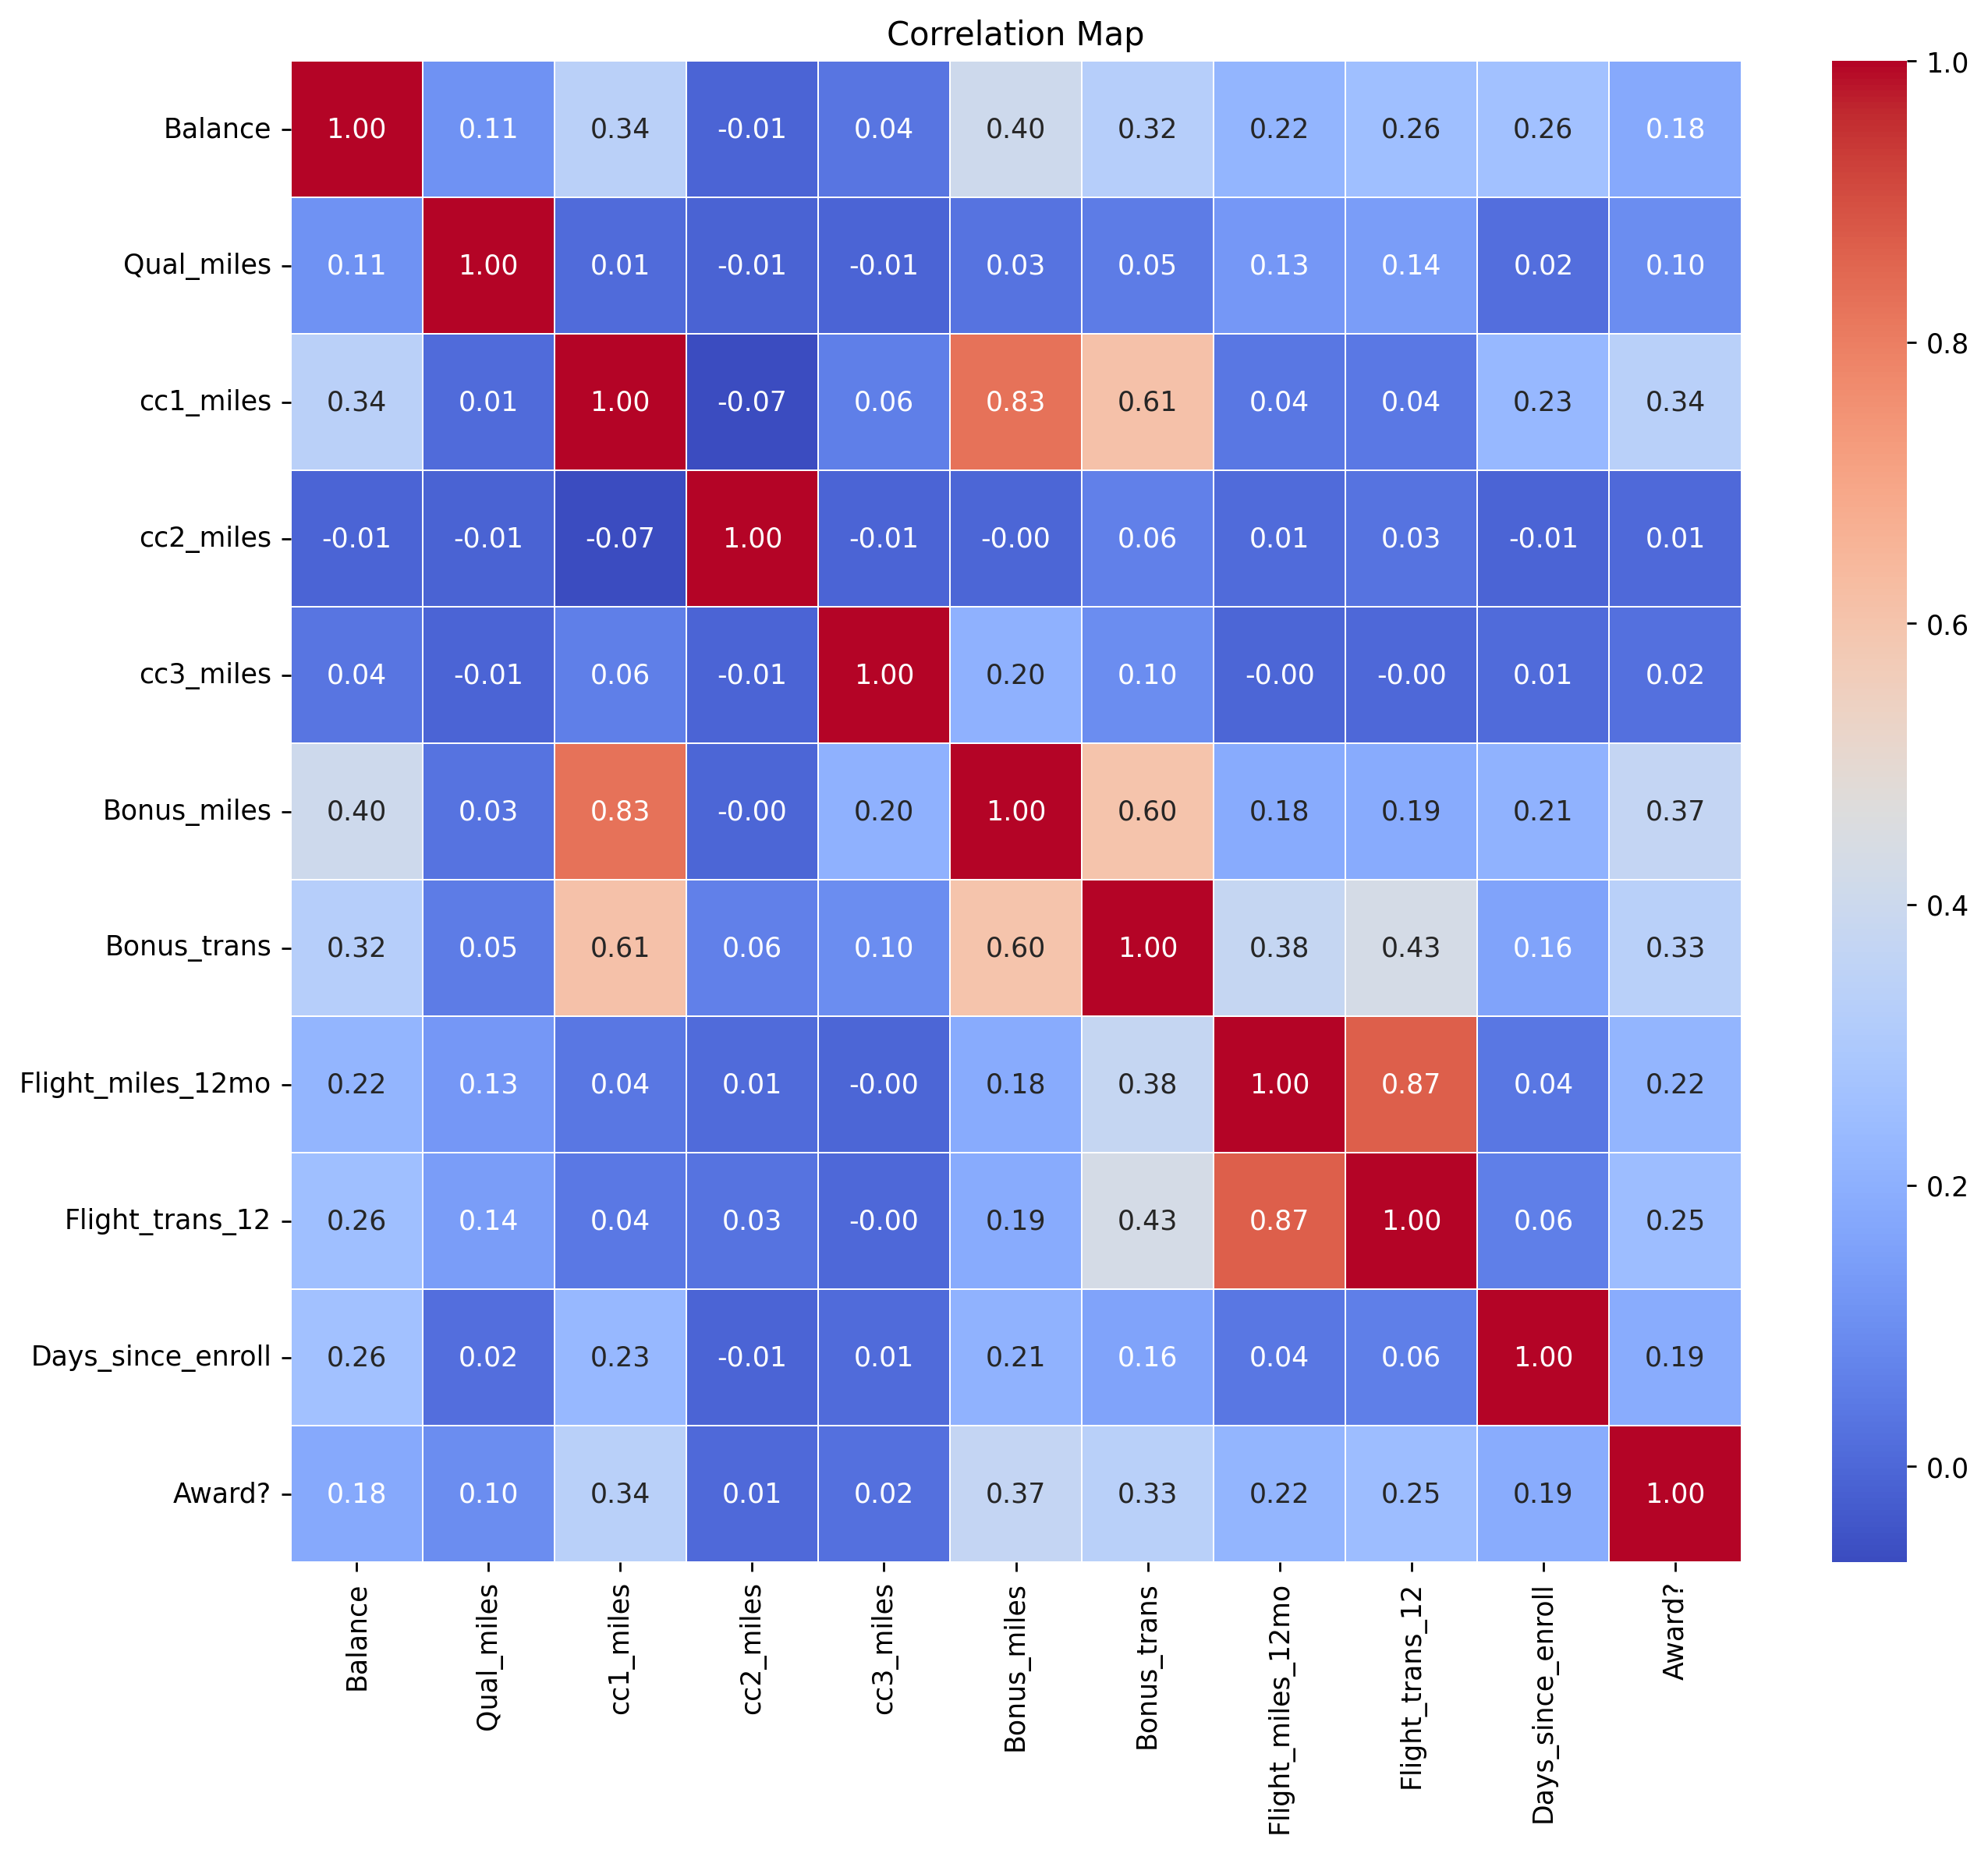

In [ ]:
# Assuming df is your DataFrame containing numerical columns
s = df.select_dtypes(include="number").corr()
# Set up the matplotlib figure
plt.figure(figsize=(12, 10))
# Create a heatmap with a diverging color map and display the correlation coefficients
sns.heatmap(s, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
# Add a title
plt.title("Correlation Map")

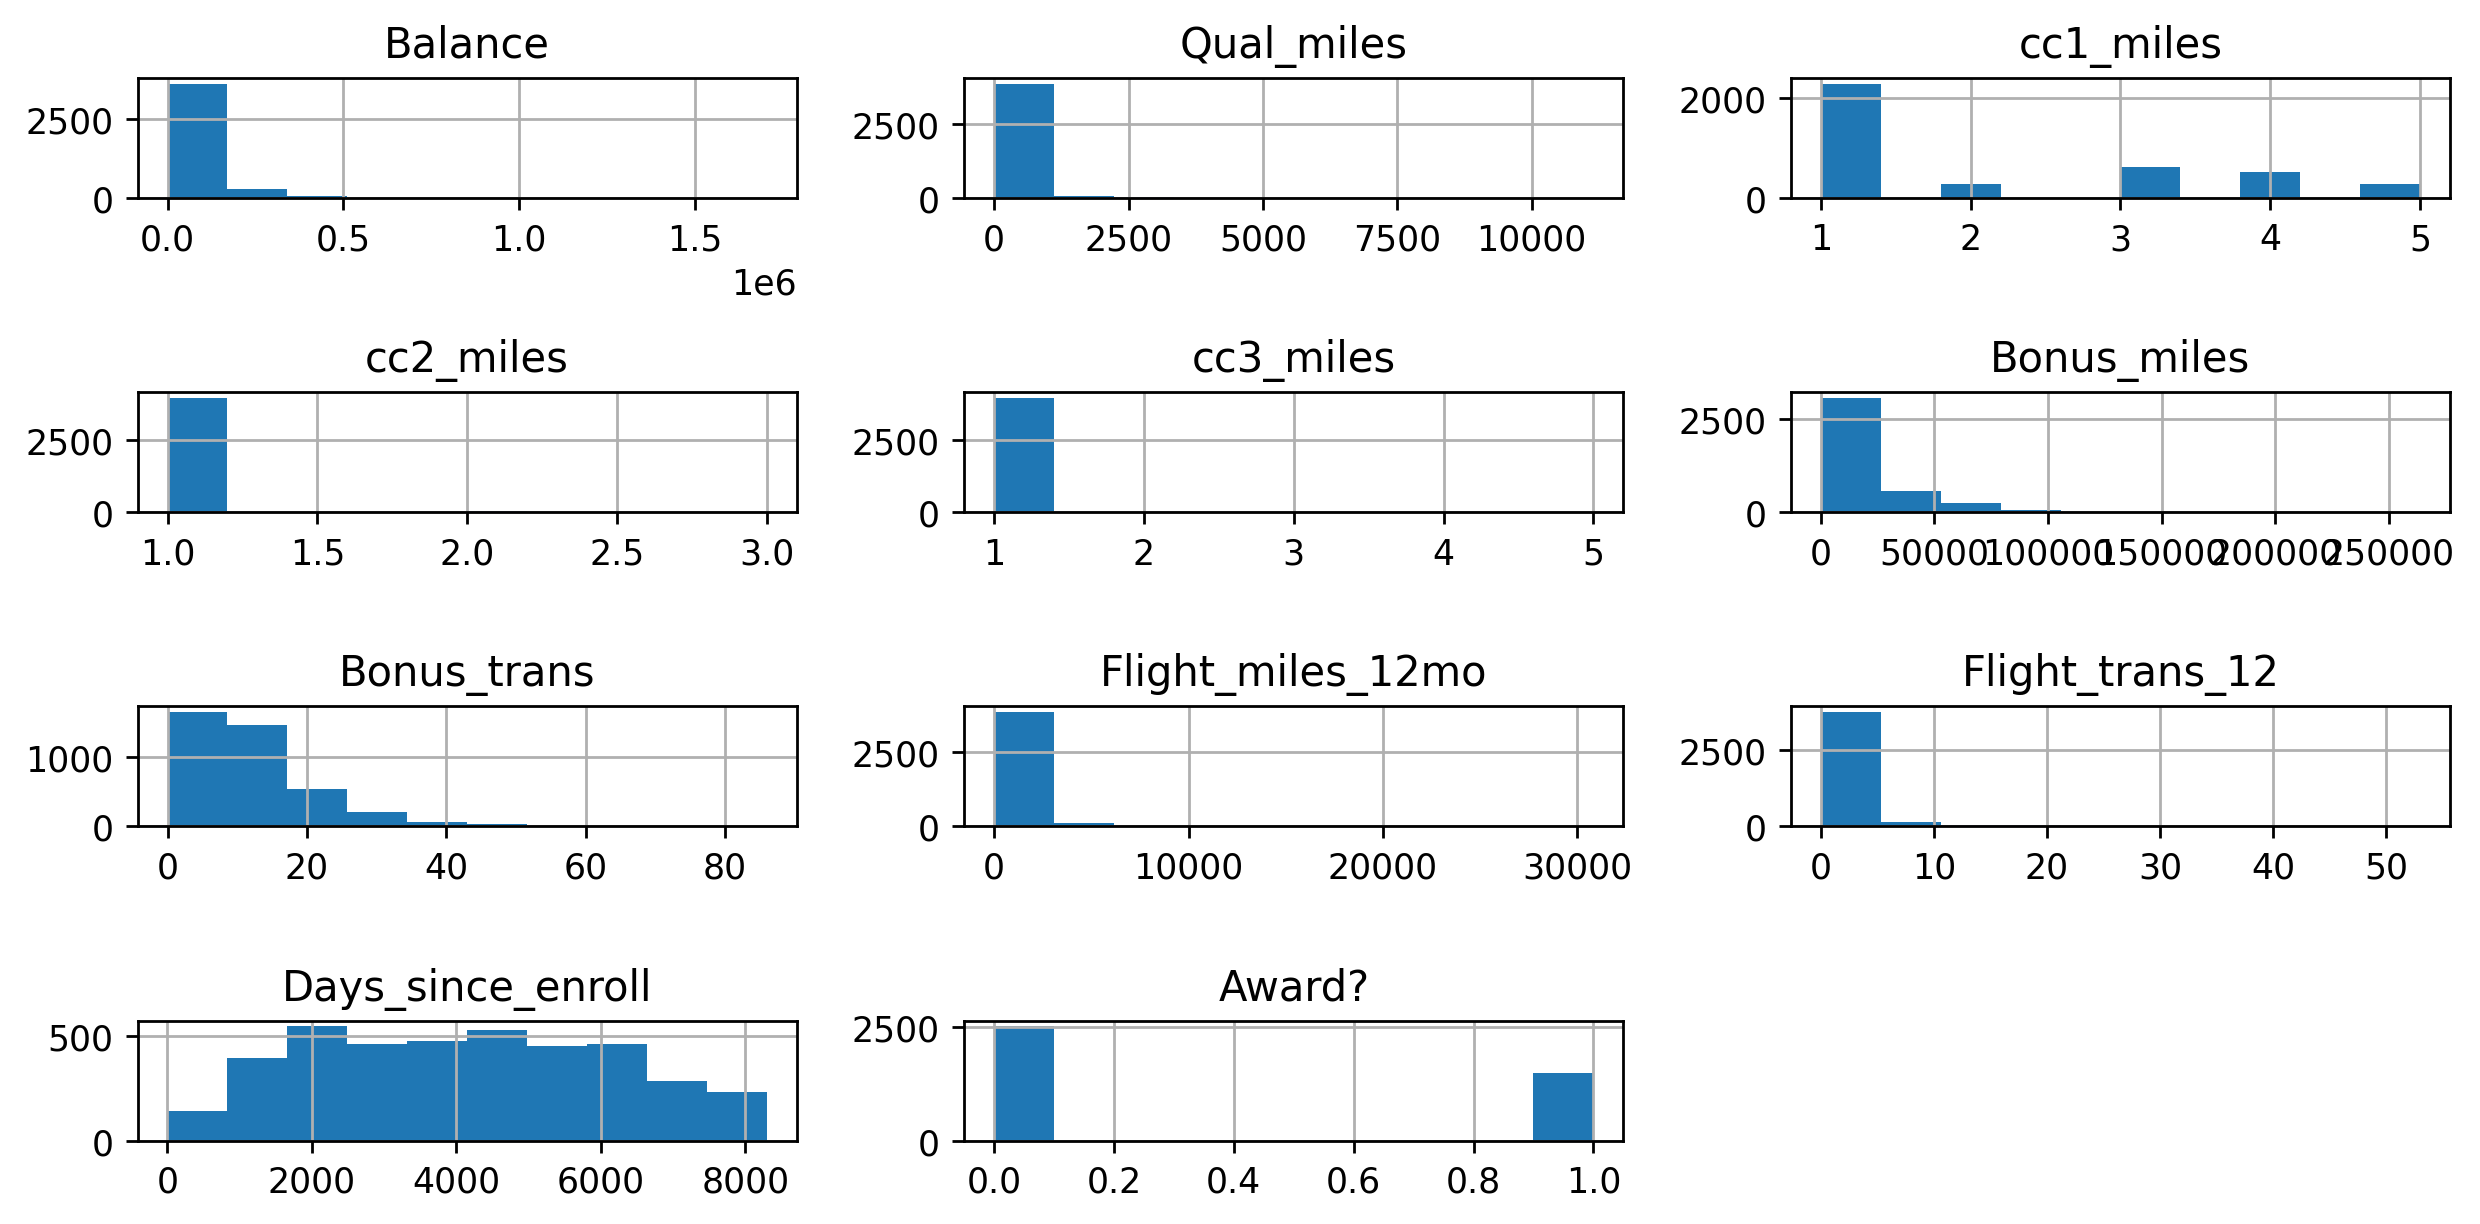

In [ ]:
df.hist()
plt.tight_layout()

In [ ]:
#scatterplot to understand relatinship

In [ ]:
sns.pairplot(df)

Output hidden; open in https://colab.research.google.com to view.

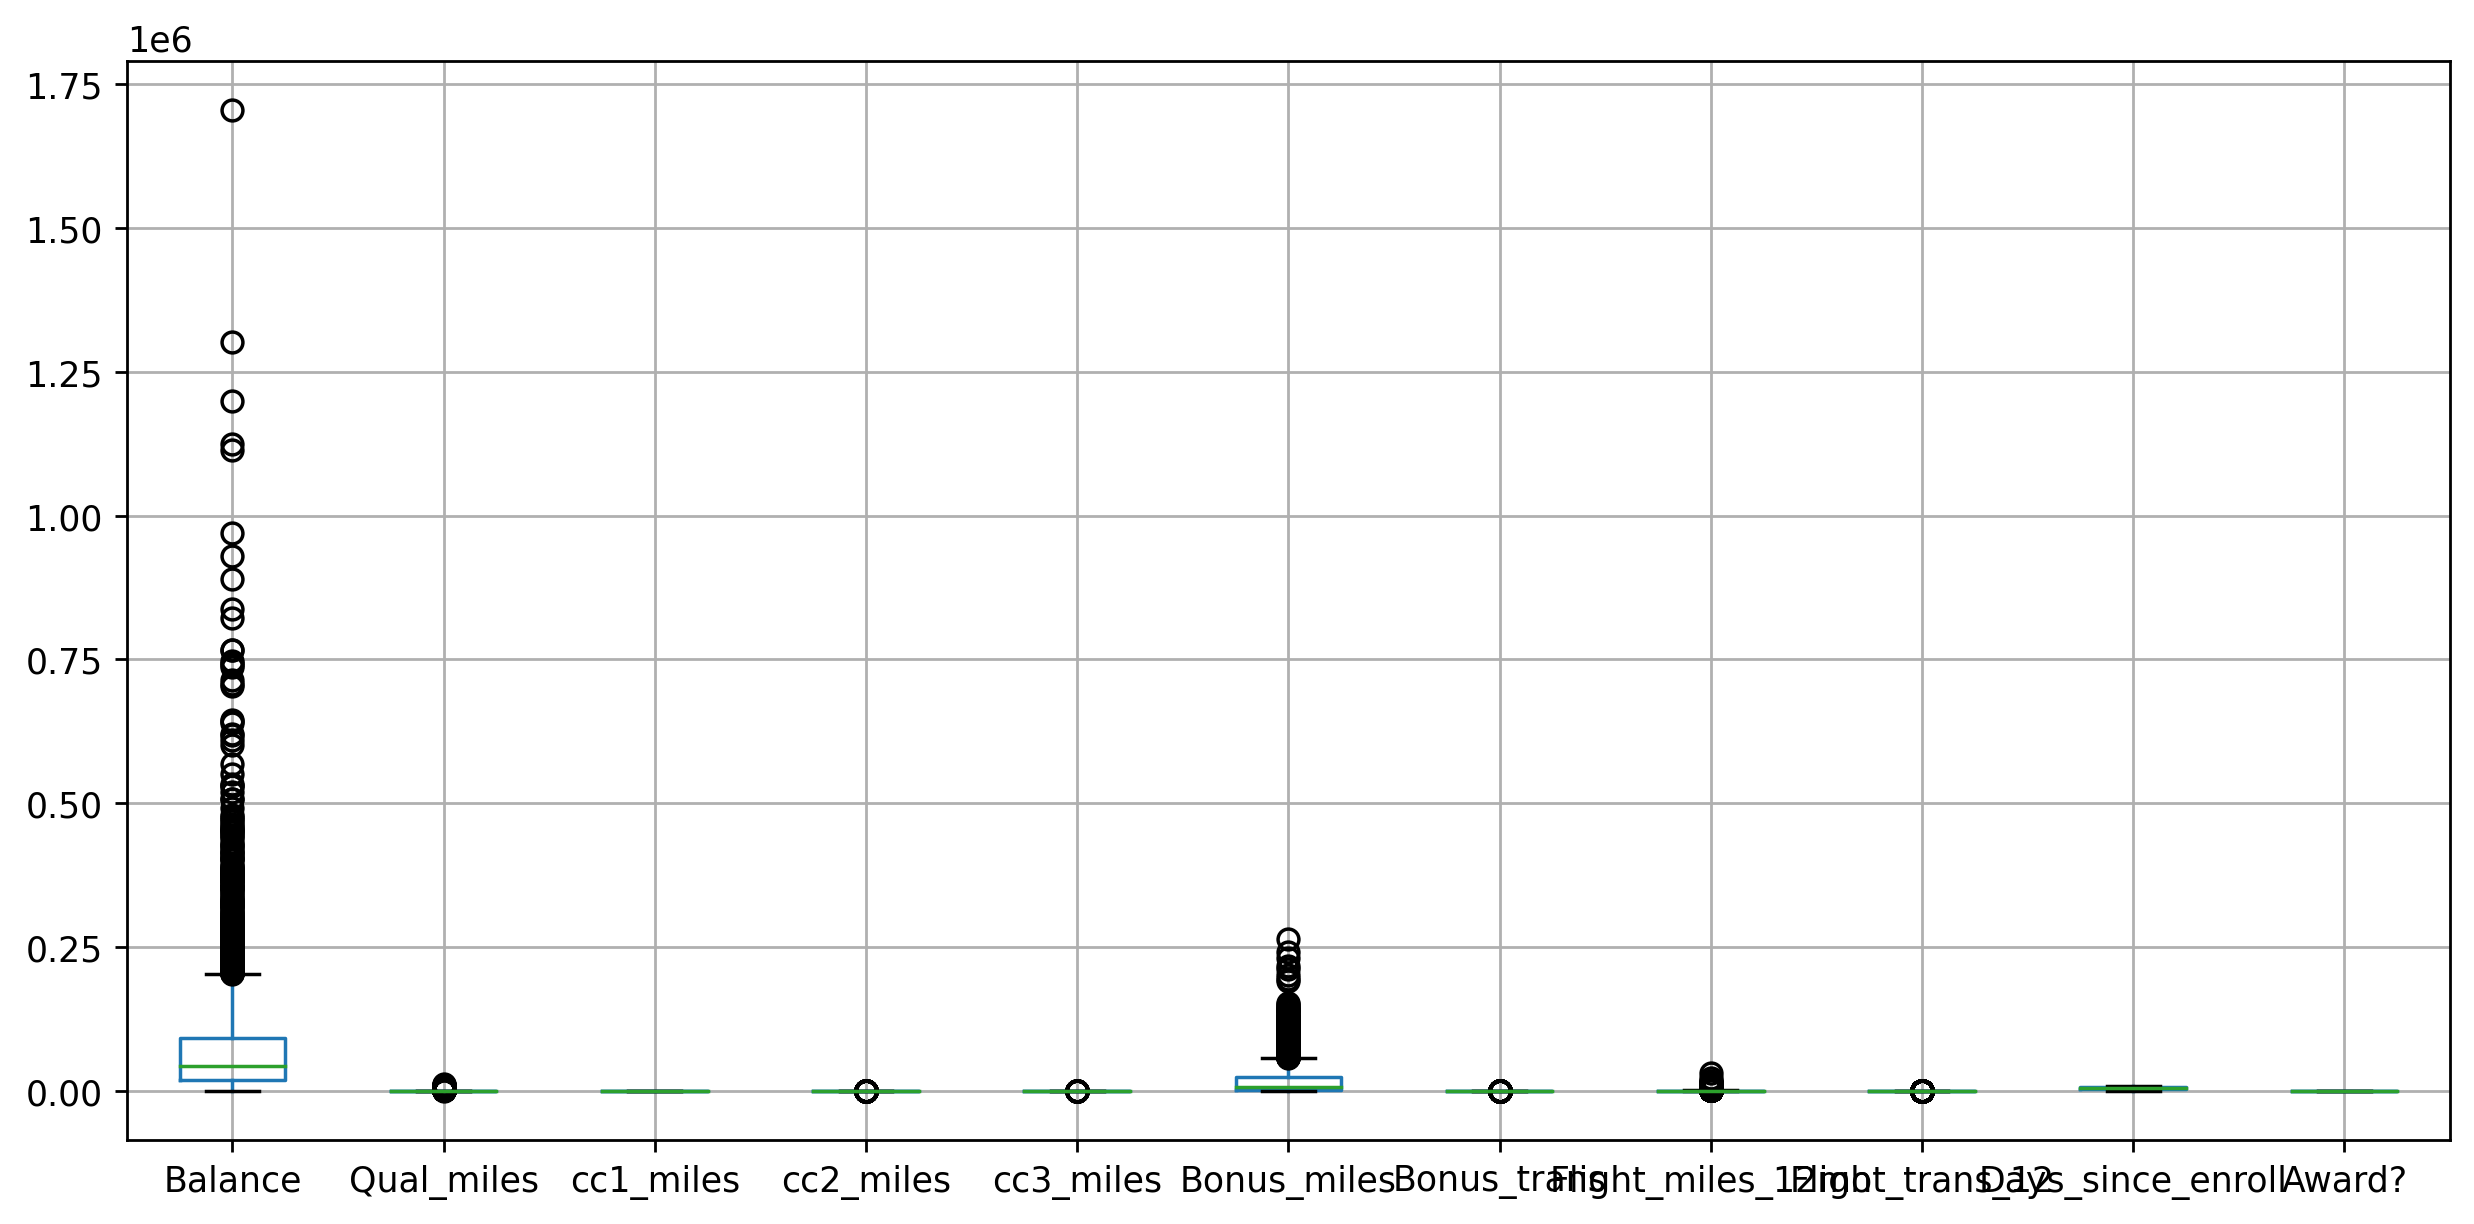

In [ ]:
df.boxplot()
plt.tight_layout()

# for delete outliers

In [ ]:
df.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [29]:
import numpy as np
def calculate_whisker(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lw = q1 - 1.5 * iqr
    uw = q3 + 1.5 * iqr
    return lw, uw

# Loop through the list and replace outliers
for i in ['Balance', 'Qual_miles','cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12']:
    lw, uw = calculate_whisker(df[i])
    df[i] = np.where(df[i] < lw, lw, df[i])
    df[i] = np.where(df[i] > uw, uw, df[i])

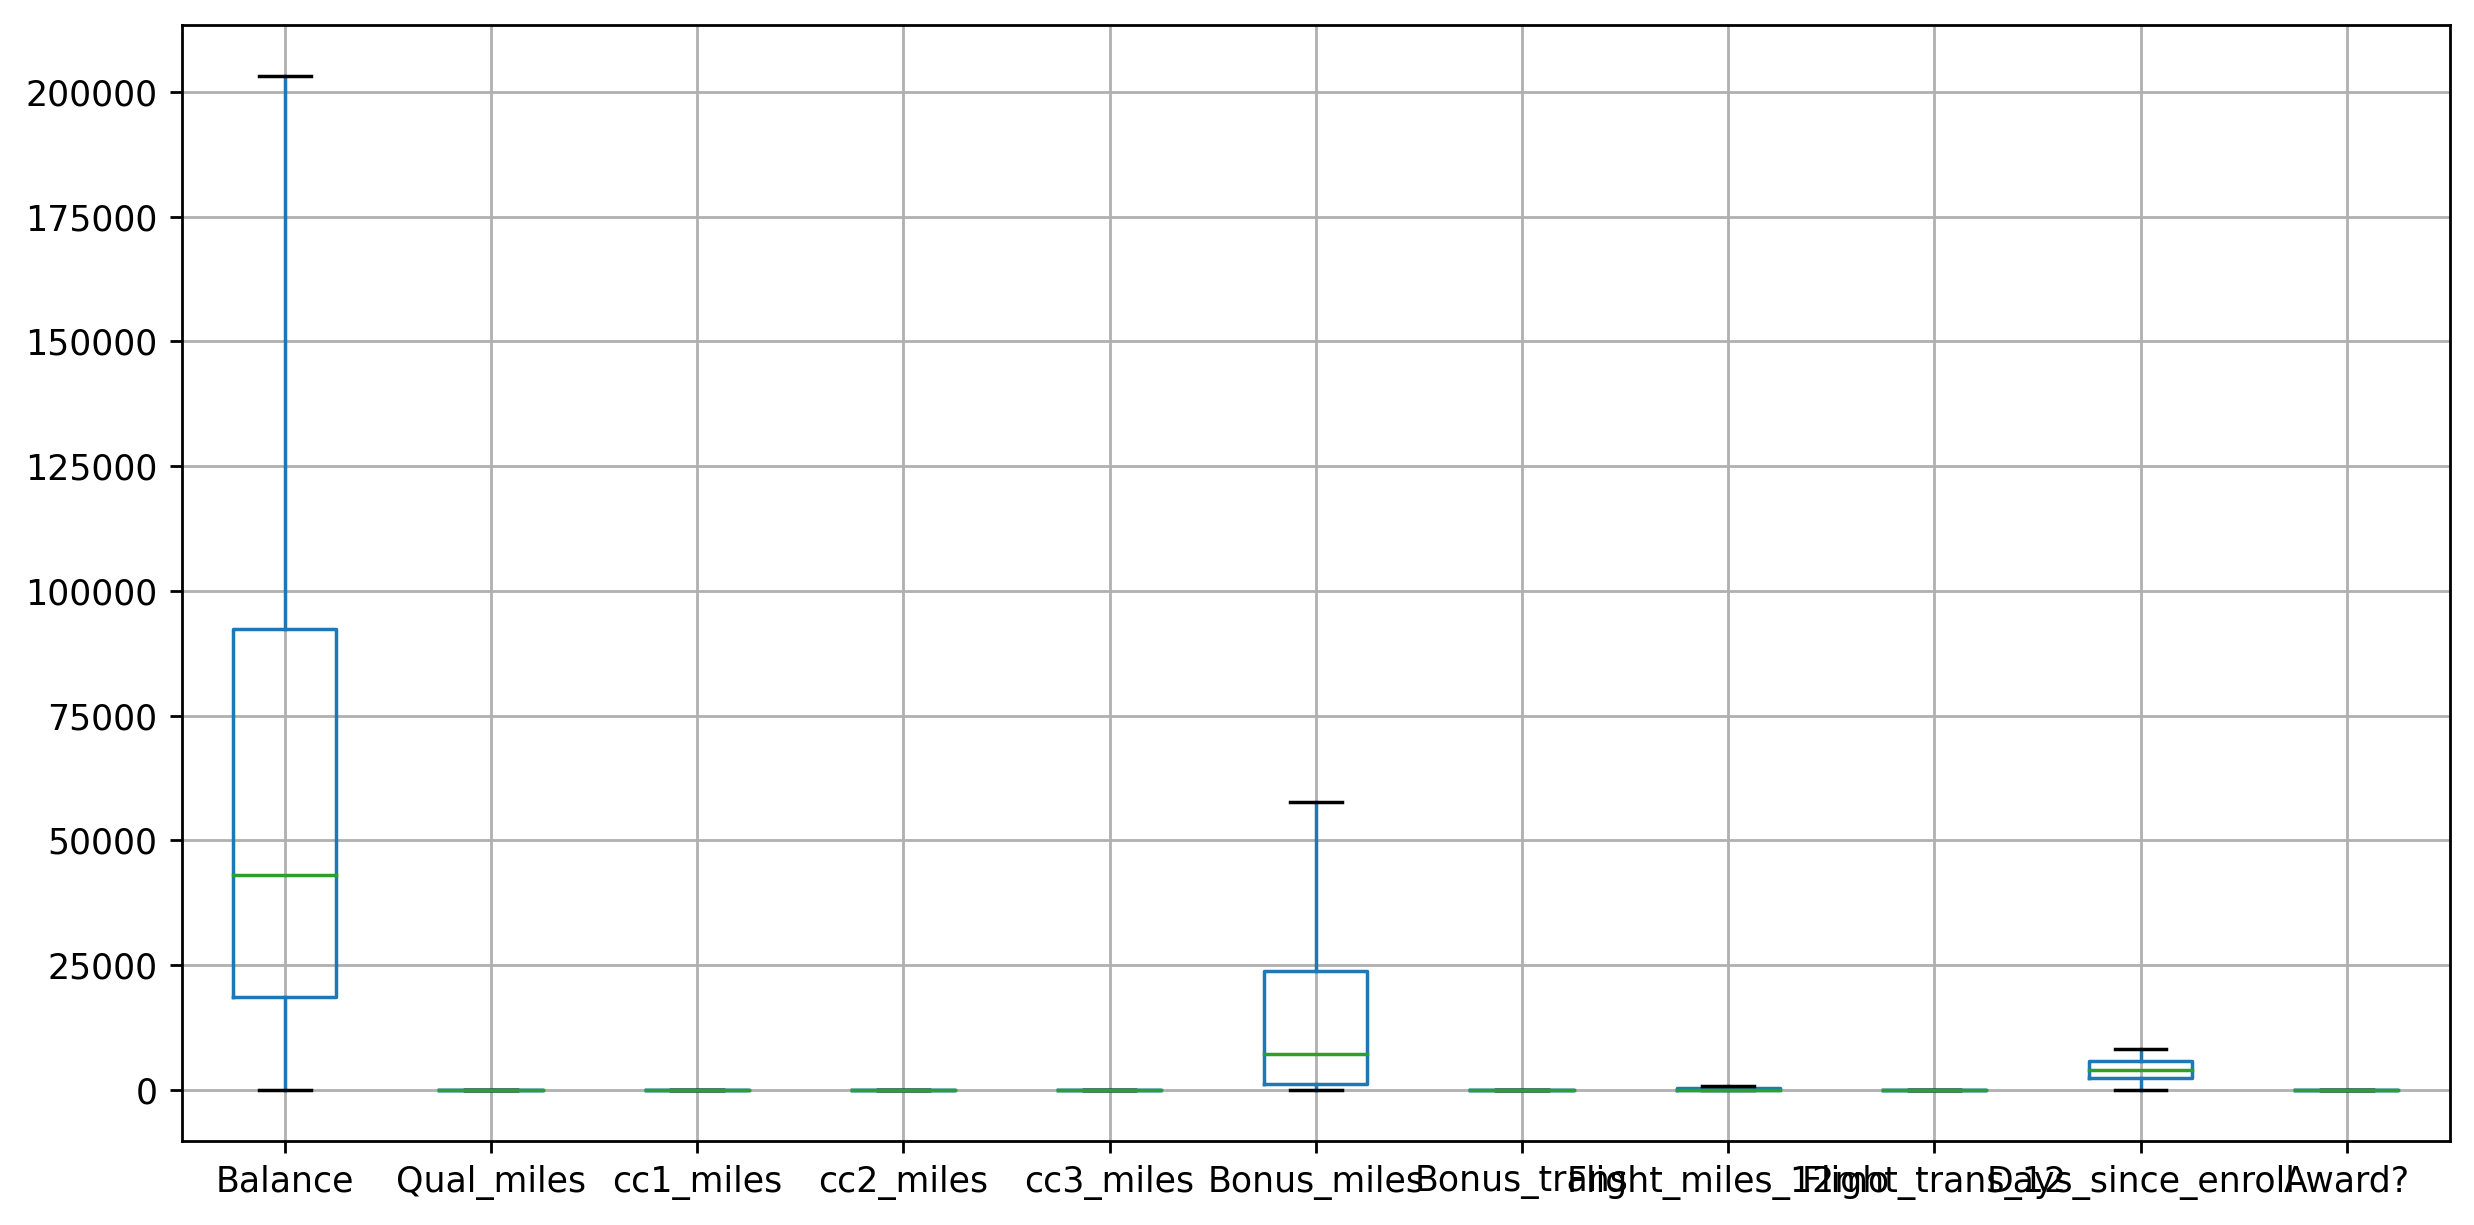

In [30]:
df.boxplot()
plt.tight_layout()

#Feature engineering

In [101]:
data['total_cc_miles'] = data['cc1_miles'] + data['cc2_miles'] + data['cc3_miles']
data['bonus_per_transaction'] = data['Bonus_miles'] / data['Bonus_trans']
data['avg_flight_miles_per_transaction'] = data['Flight_miles_12mo'] / data['Flight_trans_12']
data['years_since_enroll'] = data['Days_since_enroll'] / 365
data['log_balance'] = np.log1p(data['Balance'])
data['interaction_flight_miles_trans'] = data['Flight_miles_12mo'] * data['Flight_trans_12']
data['balance_bins'] = pd.cut(data['Balance'], bins=[0, 50000, 100000, np.inf], labels=['Low', 'Medium', 'High'])


#model building

In [110]:
# Print column names to inspect them
print(data.columns)

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?', 'Hierarchical_Cluster', 'KMeans_Cluster',
       'DBSCAN_Cluster'],
      dtype='object')


In [113]:
# Check for any extra spaces in column names
data.columns = data.columns.str.strip()

# Specify features for clustering
features = ['Balance', 'cc1_miles', 'cc2_miles', 'cc3_miles',
            'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12']

In [114]:
# Filter the dataset with selected features
X = data[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#k-means

In [116]:
# Function to perform K-Means clustering and plot elbow plot
def plot_elbow(X, max_clusters=10):
    distortions = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_clusters + 1), distortions, marker='o')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Distortion')
    plt.show()

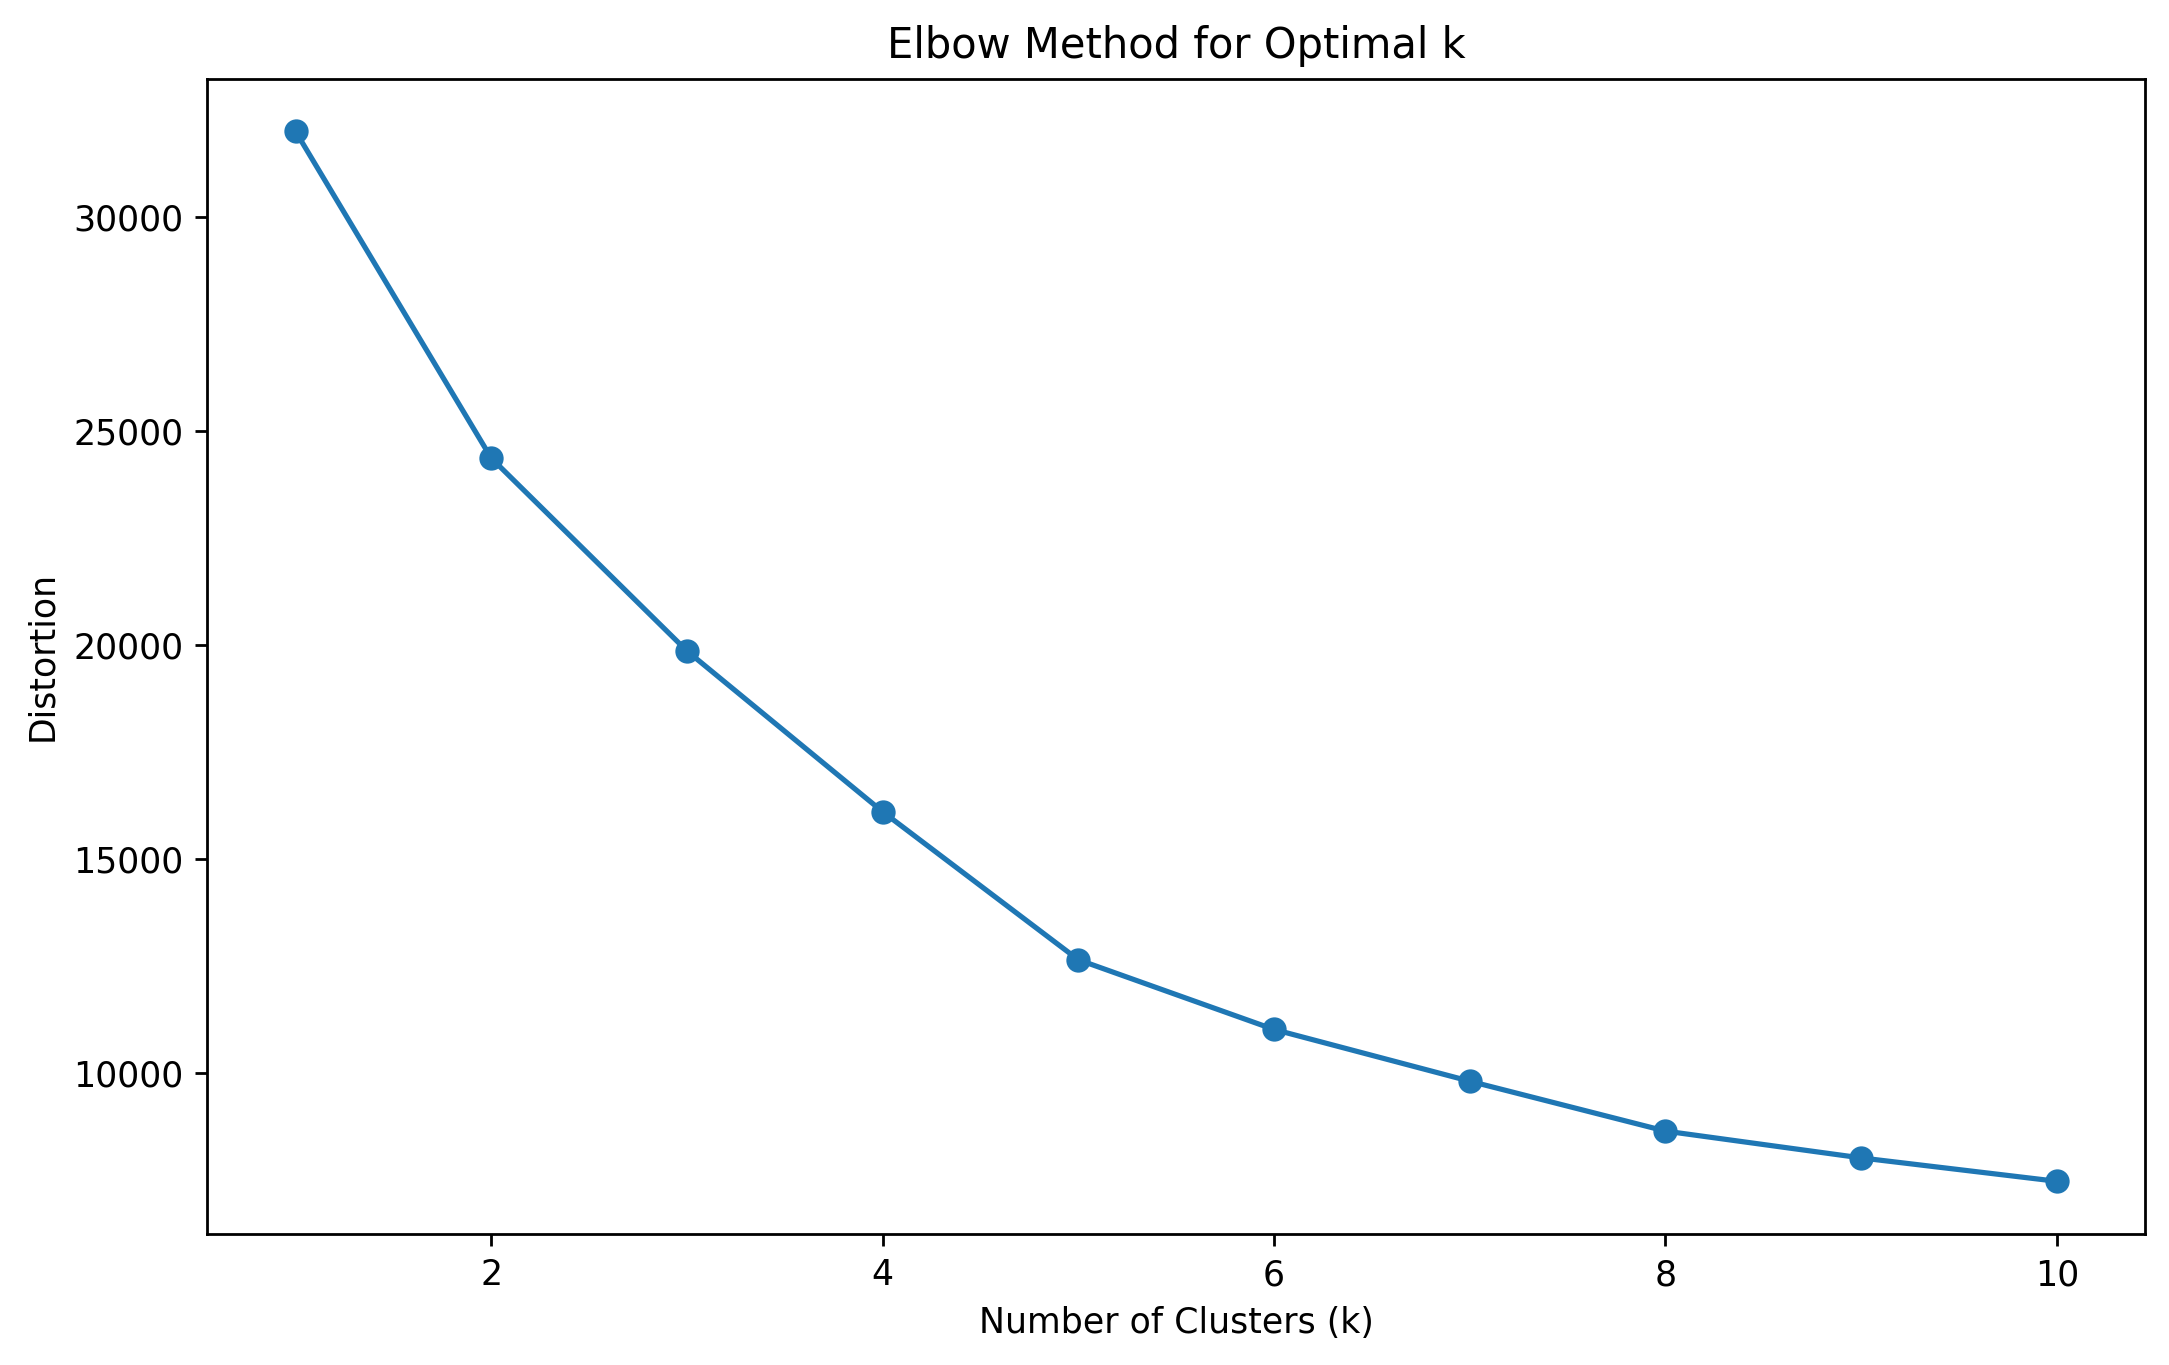

In [117]:
# Plot the elbow plot for K-Means clustering
plot_elbow(X_scaled)

In [143]:
# Perform K-Means clustering with the optimal number of clusters
optimal_k = 5 # Adjust this based on the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

In [144]:
# Perform hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=optimal_k)
hierarchical_labels = hierarchical.fit_predict(X_scaled)

In [145]:
# Function to perform hierarchical clustering and plot dendrogram
def plot_dendrogram(X, method='ward'):
    linked = linkage(X, method=method)
    plt.figure(figsize=(12, 8))
    dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()

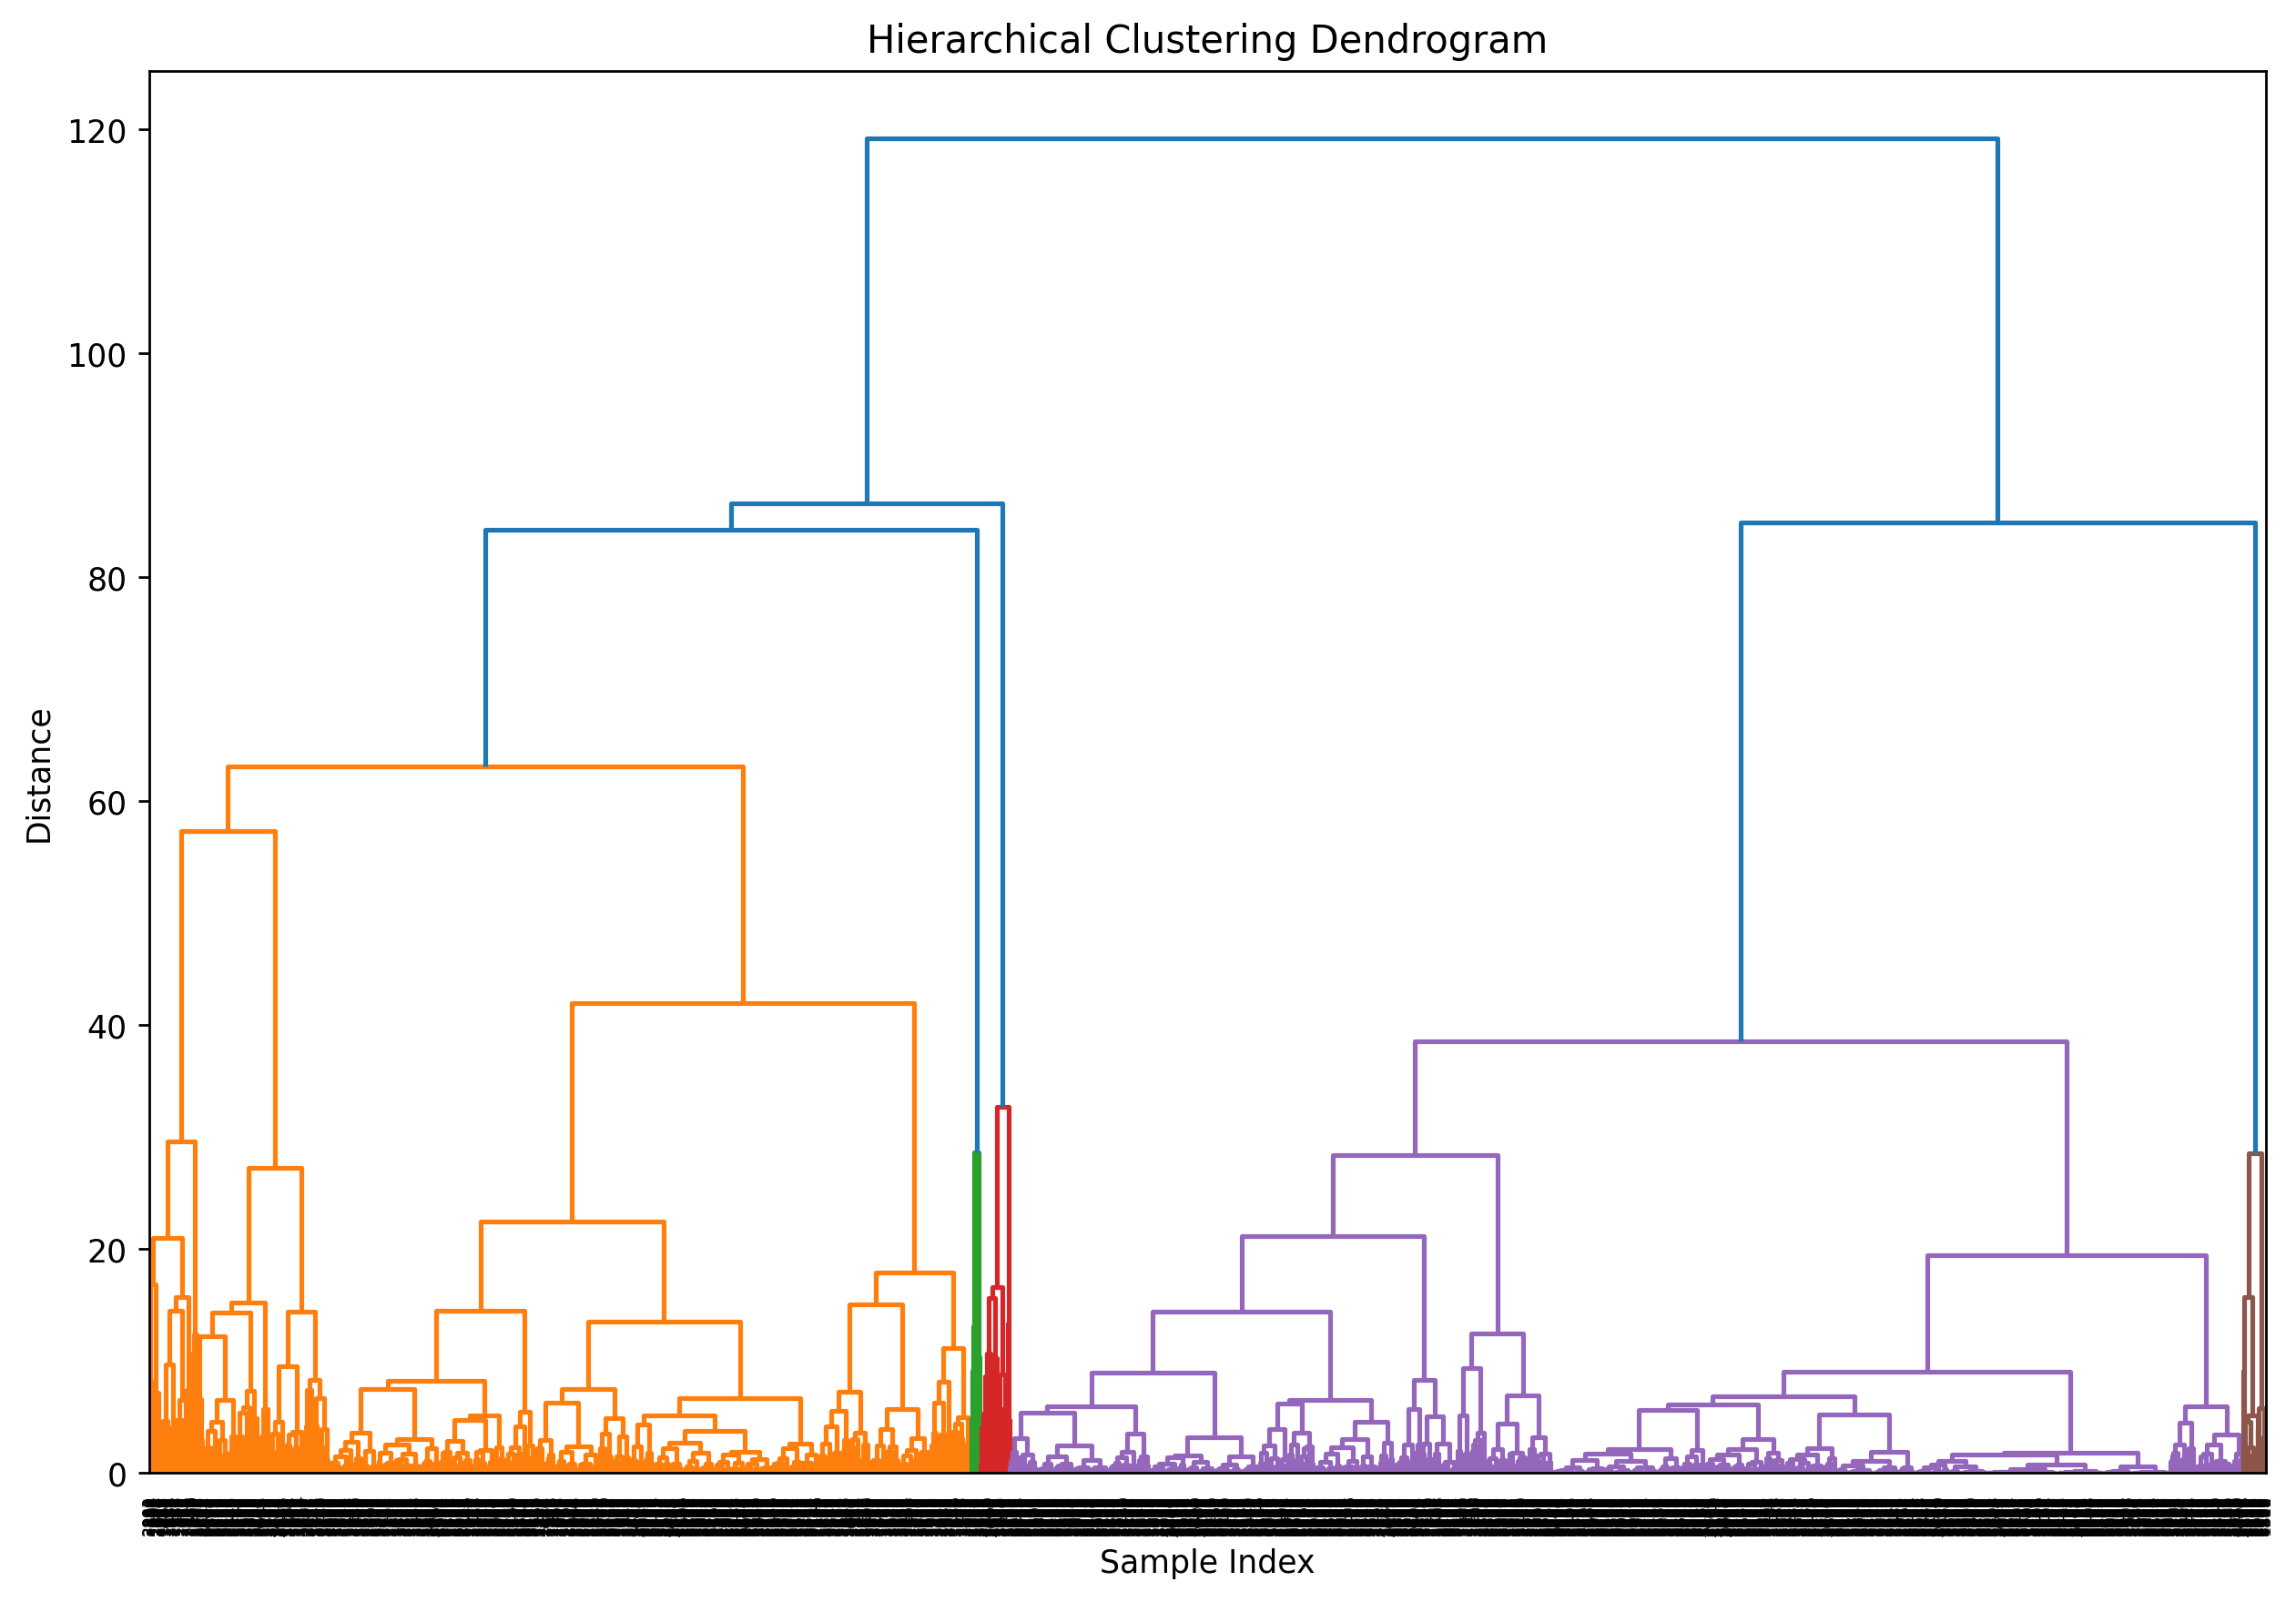

In [146]:
# Plot the dendrogram for hierarchical clustering
plot_dendrogram(X_scaled)

In [148]:
# Perform DBSCAN clustering and plot silhouette scores
eps_range = np.arange(0.2, 2.0, 0.2)
silhouette_scores = []

for eps in eps_range:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    dbscan_labels = dbscan.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, dbscan_labels))


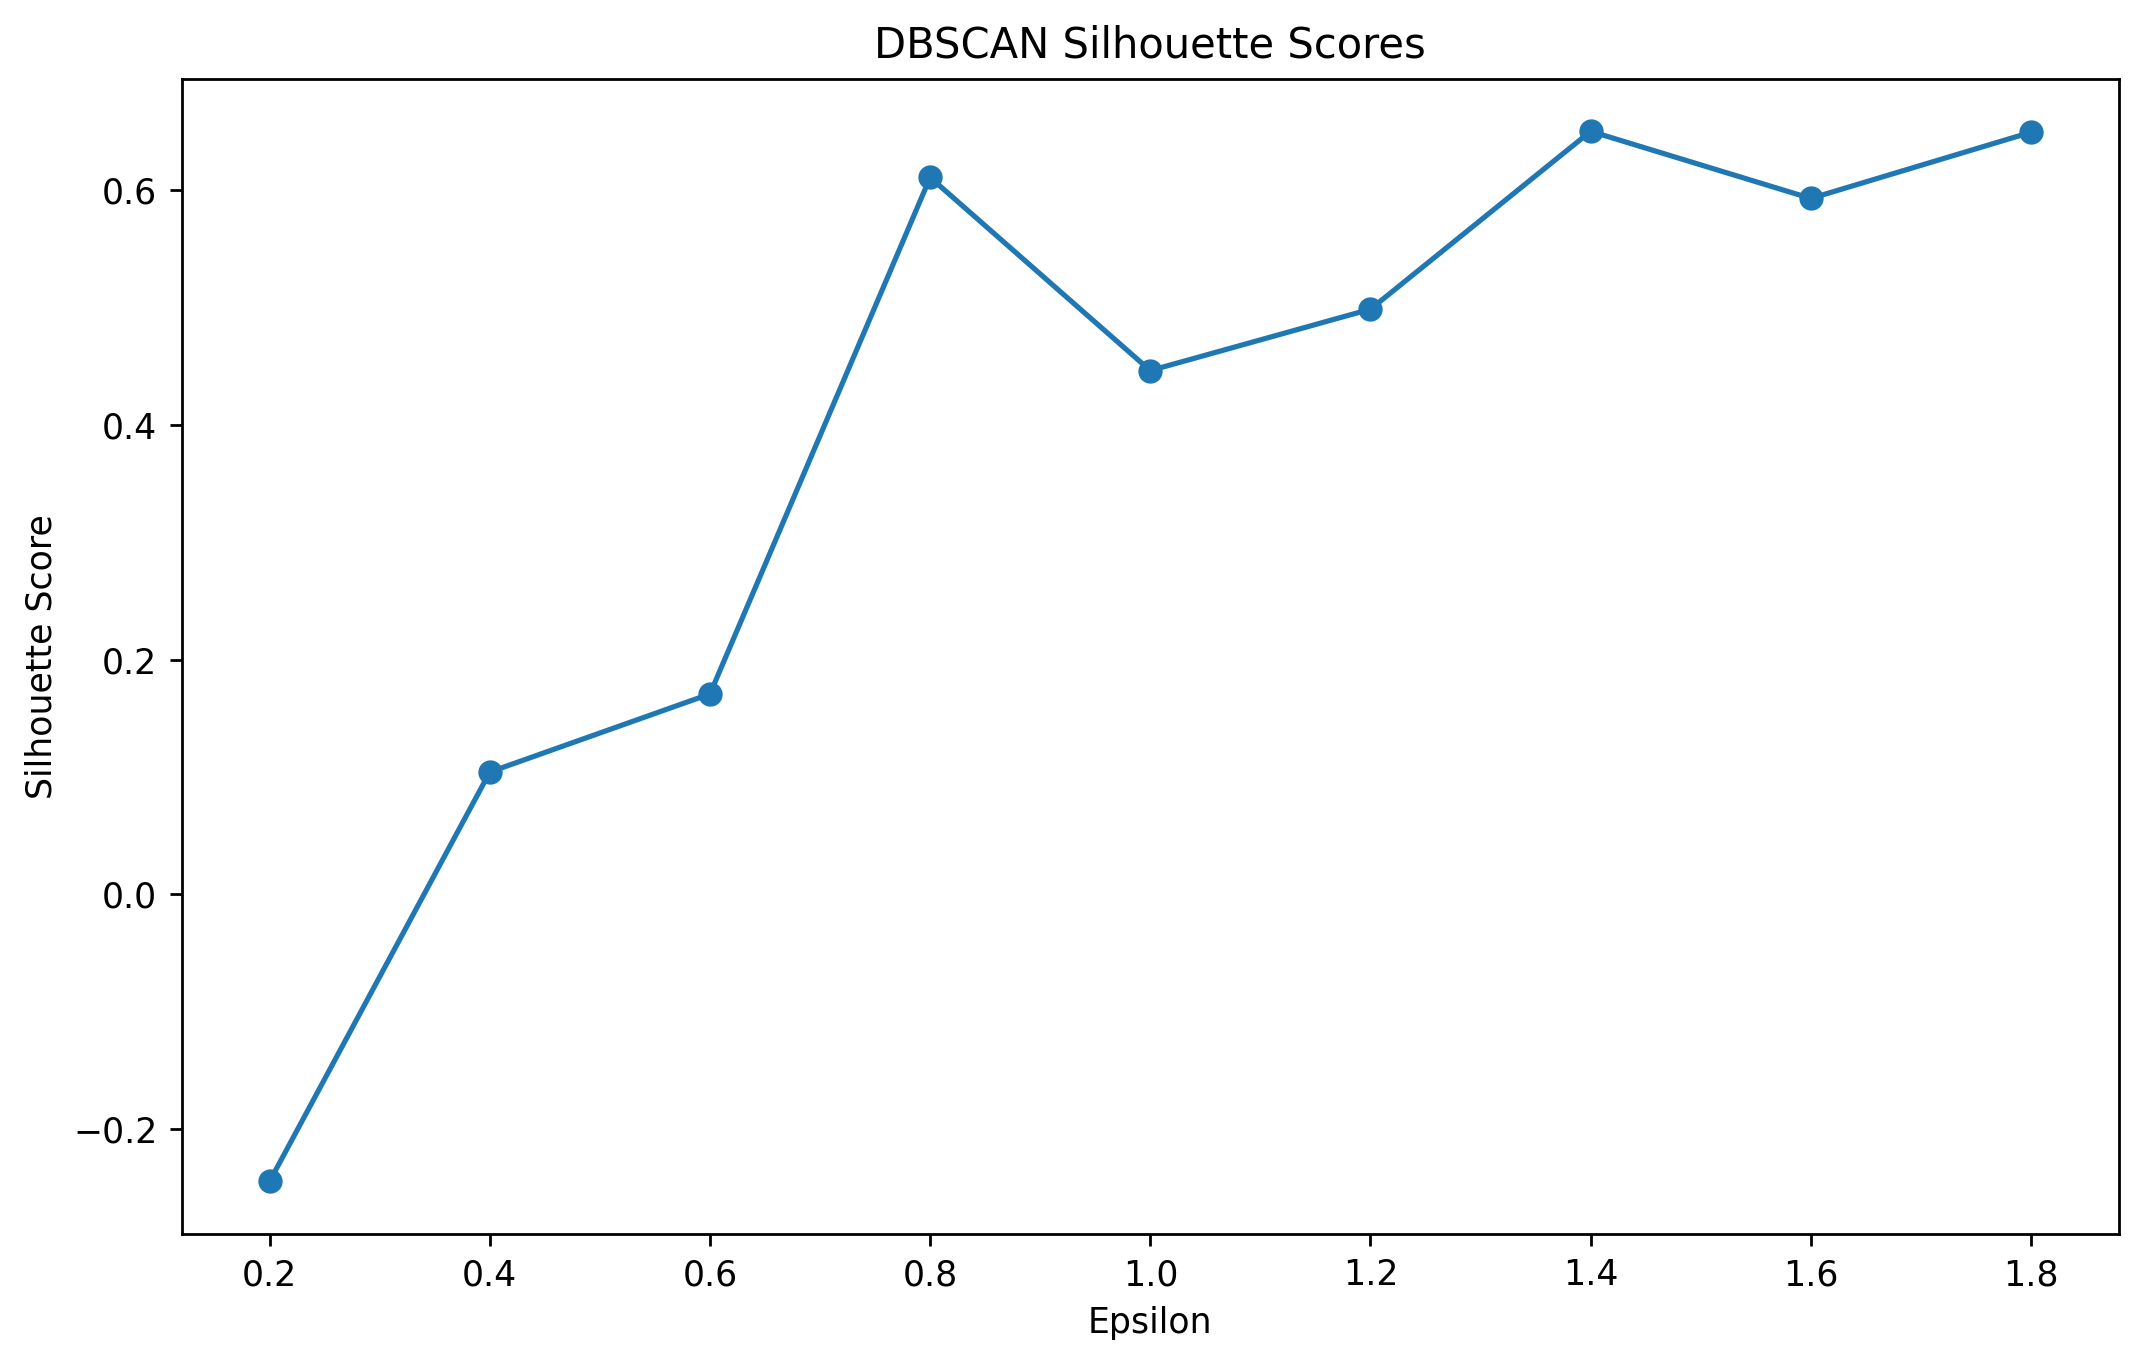

In [121]:
# Plot silhouette scores for DBSCAN
plt.figure(figsize=(10, 6))
plt.plot(eps_range, silhouette_scores, marker='o')
plt.title('DBSCAN Silhouette Scores')
plt.xlabel('Epsilon')
plt.ylabel('Silhouette Score')
plt.show()

In [150]:
# Perform DBSCAN clustering with the optimal parameters
optimal_eps = 2  # Adjust this based on the silhouette scores plot
dbscan = DBSCAN(eps=optimal_eps, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

In [151]:
# Add the cluster labels to the original dataset
data['Hierarchical_Cluster'] = hierarchical_labels
data['KMeans_Cluster'] = kmeans_labels
data['DBSCAN_Cluster'] = dbscan_labels

In [152]:
# Analyze the clusters
cluster_analysis = data.groupby(['Hierarchical_Cluster', 'KMeans_Cluster', 'DBSCAN_Cluster']).size().reset_index(name='Count')
print(cluster_analysis)

    Hierarchical_Cluster  KMeans_Cluster  DBSCAN_Cluster  Count
0                      0               1               0    121
1                      0               2              -1     15
2                      0               2               0   1323
3                      0               4              -1     16
4                      0               4               0     78
5                      1               1               0   2286
6                      1               2               0     44
7                      2               4              -1     23
8                      2               4               0     32
9                      3               0              -1      7
10                     3               0               1     13
11                     3               0               2     23
12                     4               1              -1      1
13                     4               2              -1      2
14                     4               3

#calculating silhouette_score

In [153]:
from sklearn.metrics import silhouette_score

# Perform K-Means clustering with the optimal number of clusters
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=100)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Perform DBSCAN clustering with the optimal parameters
optimal_eps = 2
dbscan = DBSCAN(eps=optimal_eps, min_samples=50)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Add the cluster labels to the original dataset
data['Hierarchical_Cluster'] = AgglomerativeClustering(n_clusters=optimal_k).fit_predict(X_scaled)
data['KMeans_Cluster'] = kmeans_labels
data['DBSCAN_Cluster'] = dbscan_labels

# Reset the index
data.reset_index(drop=True, inplace=True)

# Calculate silhouette score for Hierarchical clustering
silhouette_hierarchical = silhouette_score(X_scaled, data['Hierarchical_Cluster'])
print(f"Silhouette Score (Hierarchical): {silhouette_hierarchical}")

# Calculate silhouette score for K-Means clustering
silhouette_kmeans = silhouette_score(X_scaled, data['KMeans_Cluster'])
print(f"Silhouette Score (K-Means): {silhouette_kmeans}")

# Calculate silhouette score for DBSCAN clustering
silhouette_dbscan = silhouette_score(X_scaled, data['DBSCAN_Cluster'])
print(f"Silhouette Score (DBSCAN): {silhouette_dbscan}")


Silhouette Score (Hierarchical): 0.4313576603945833
Silhouette Score (K-Means): 0.45943944523458713
Silhouette Score (DBSCAN): 0.7110171830438277


#all clusters plot

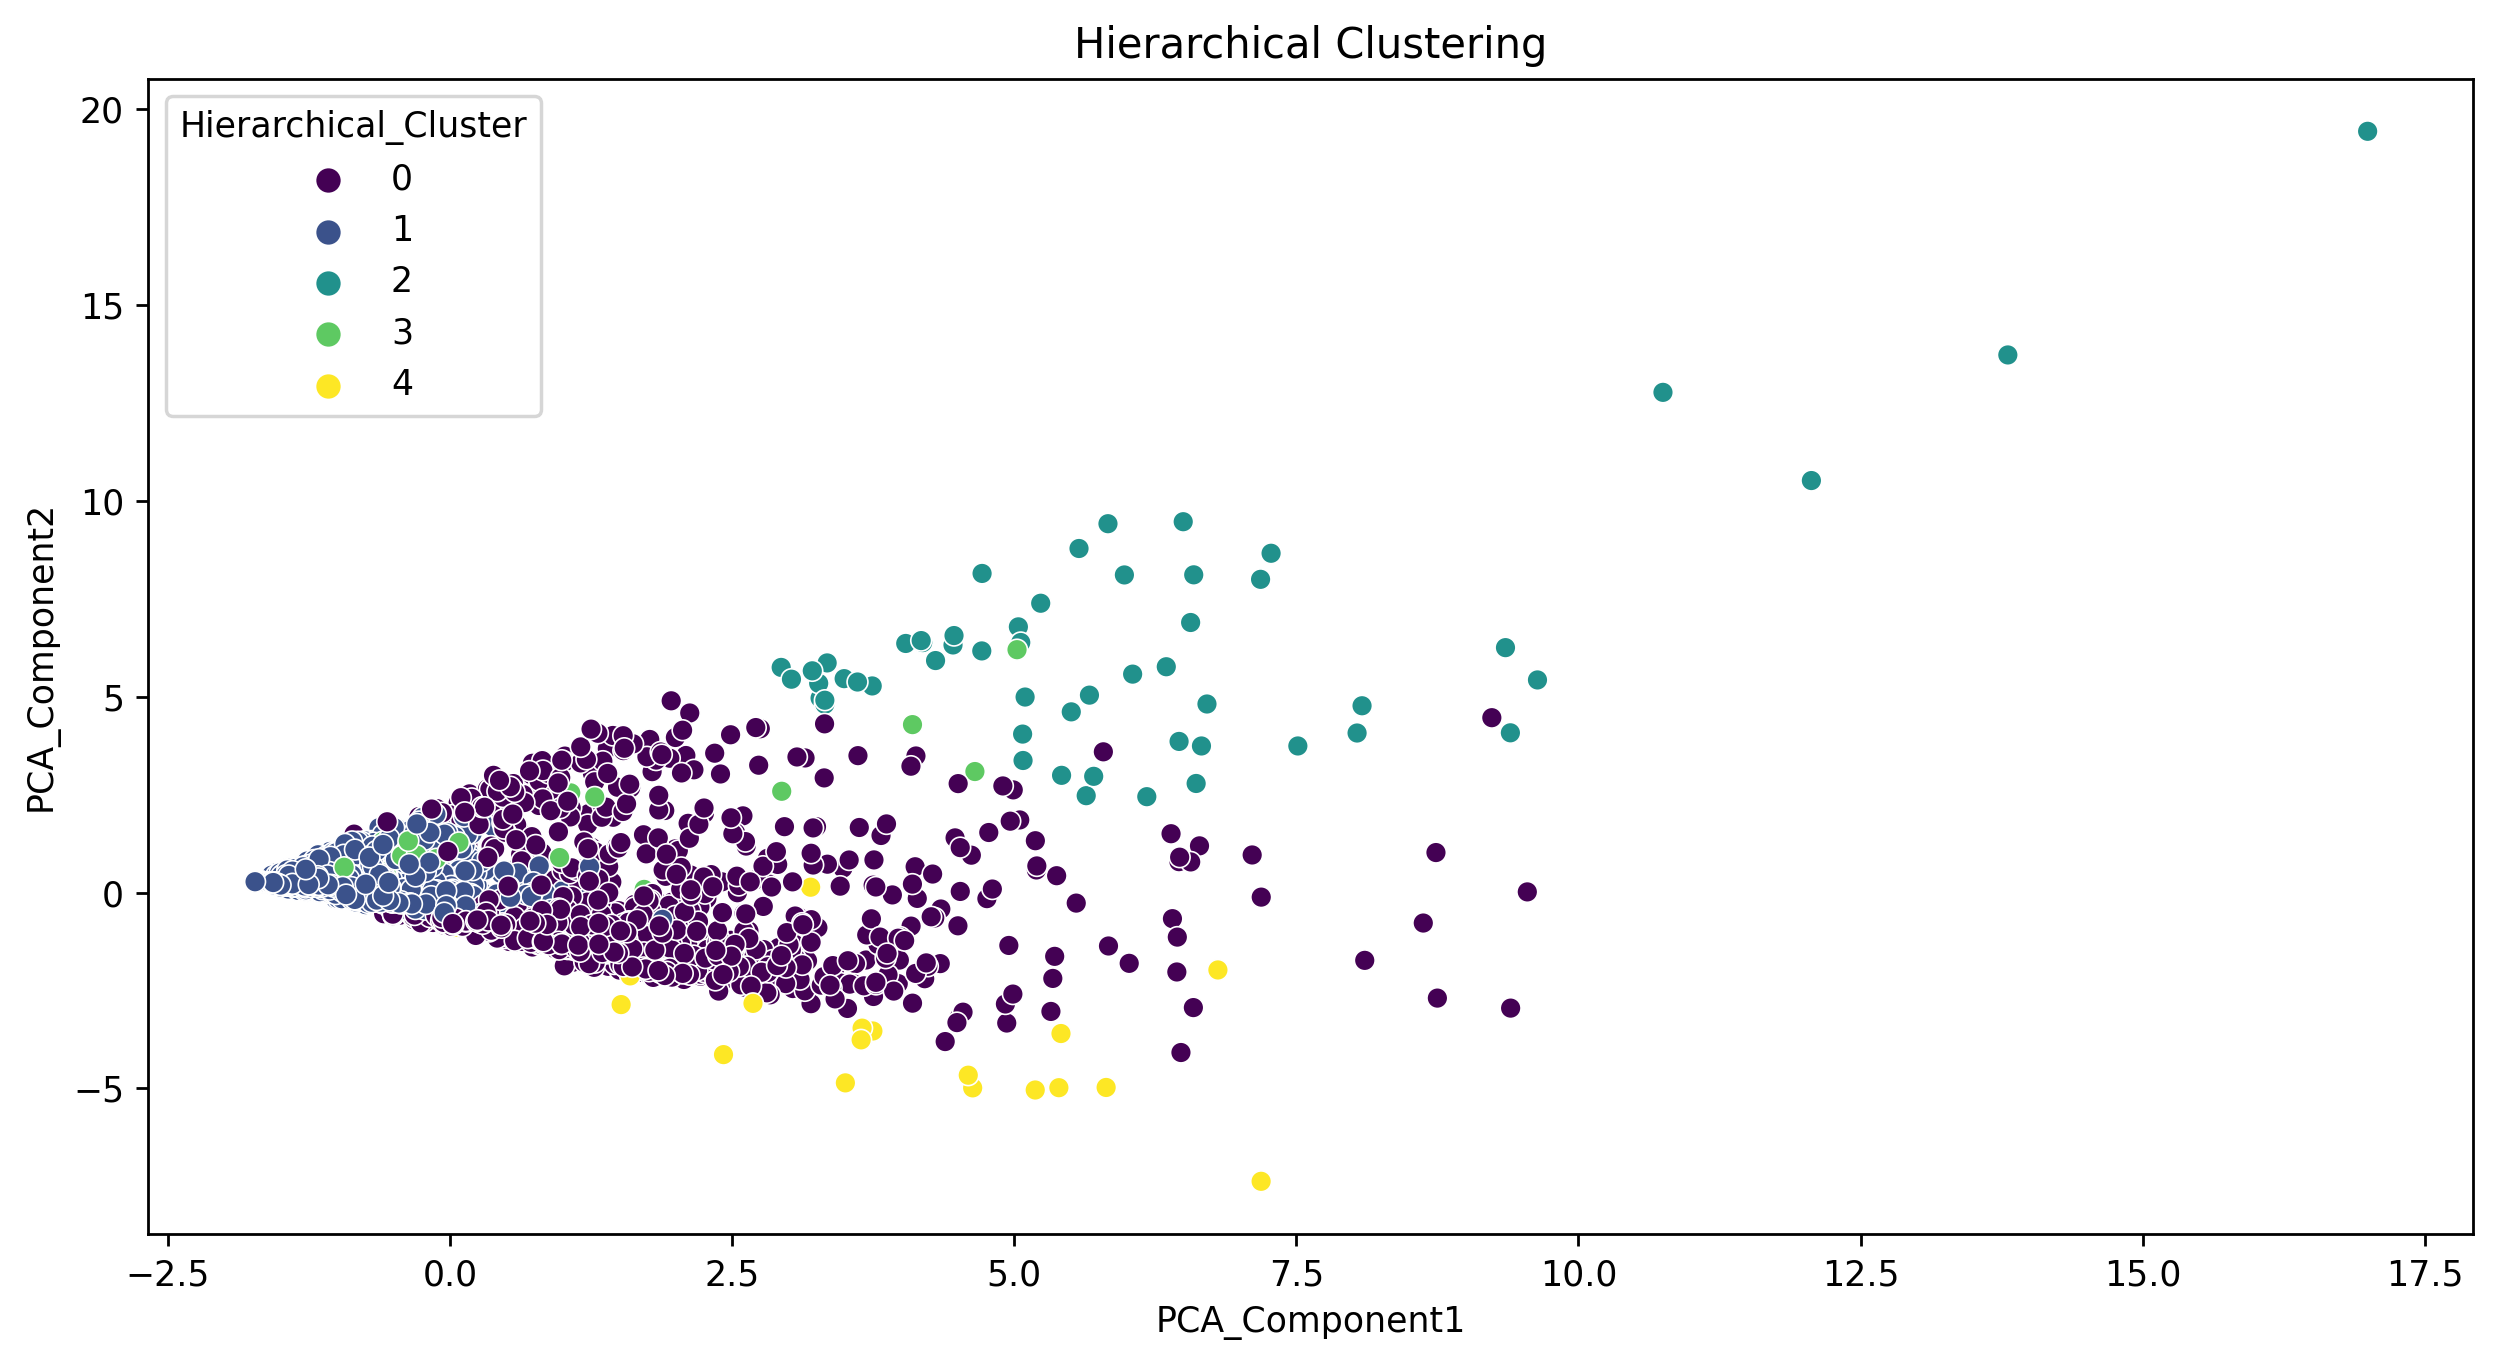

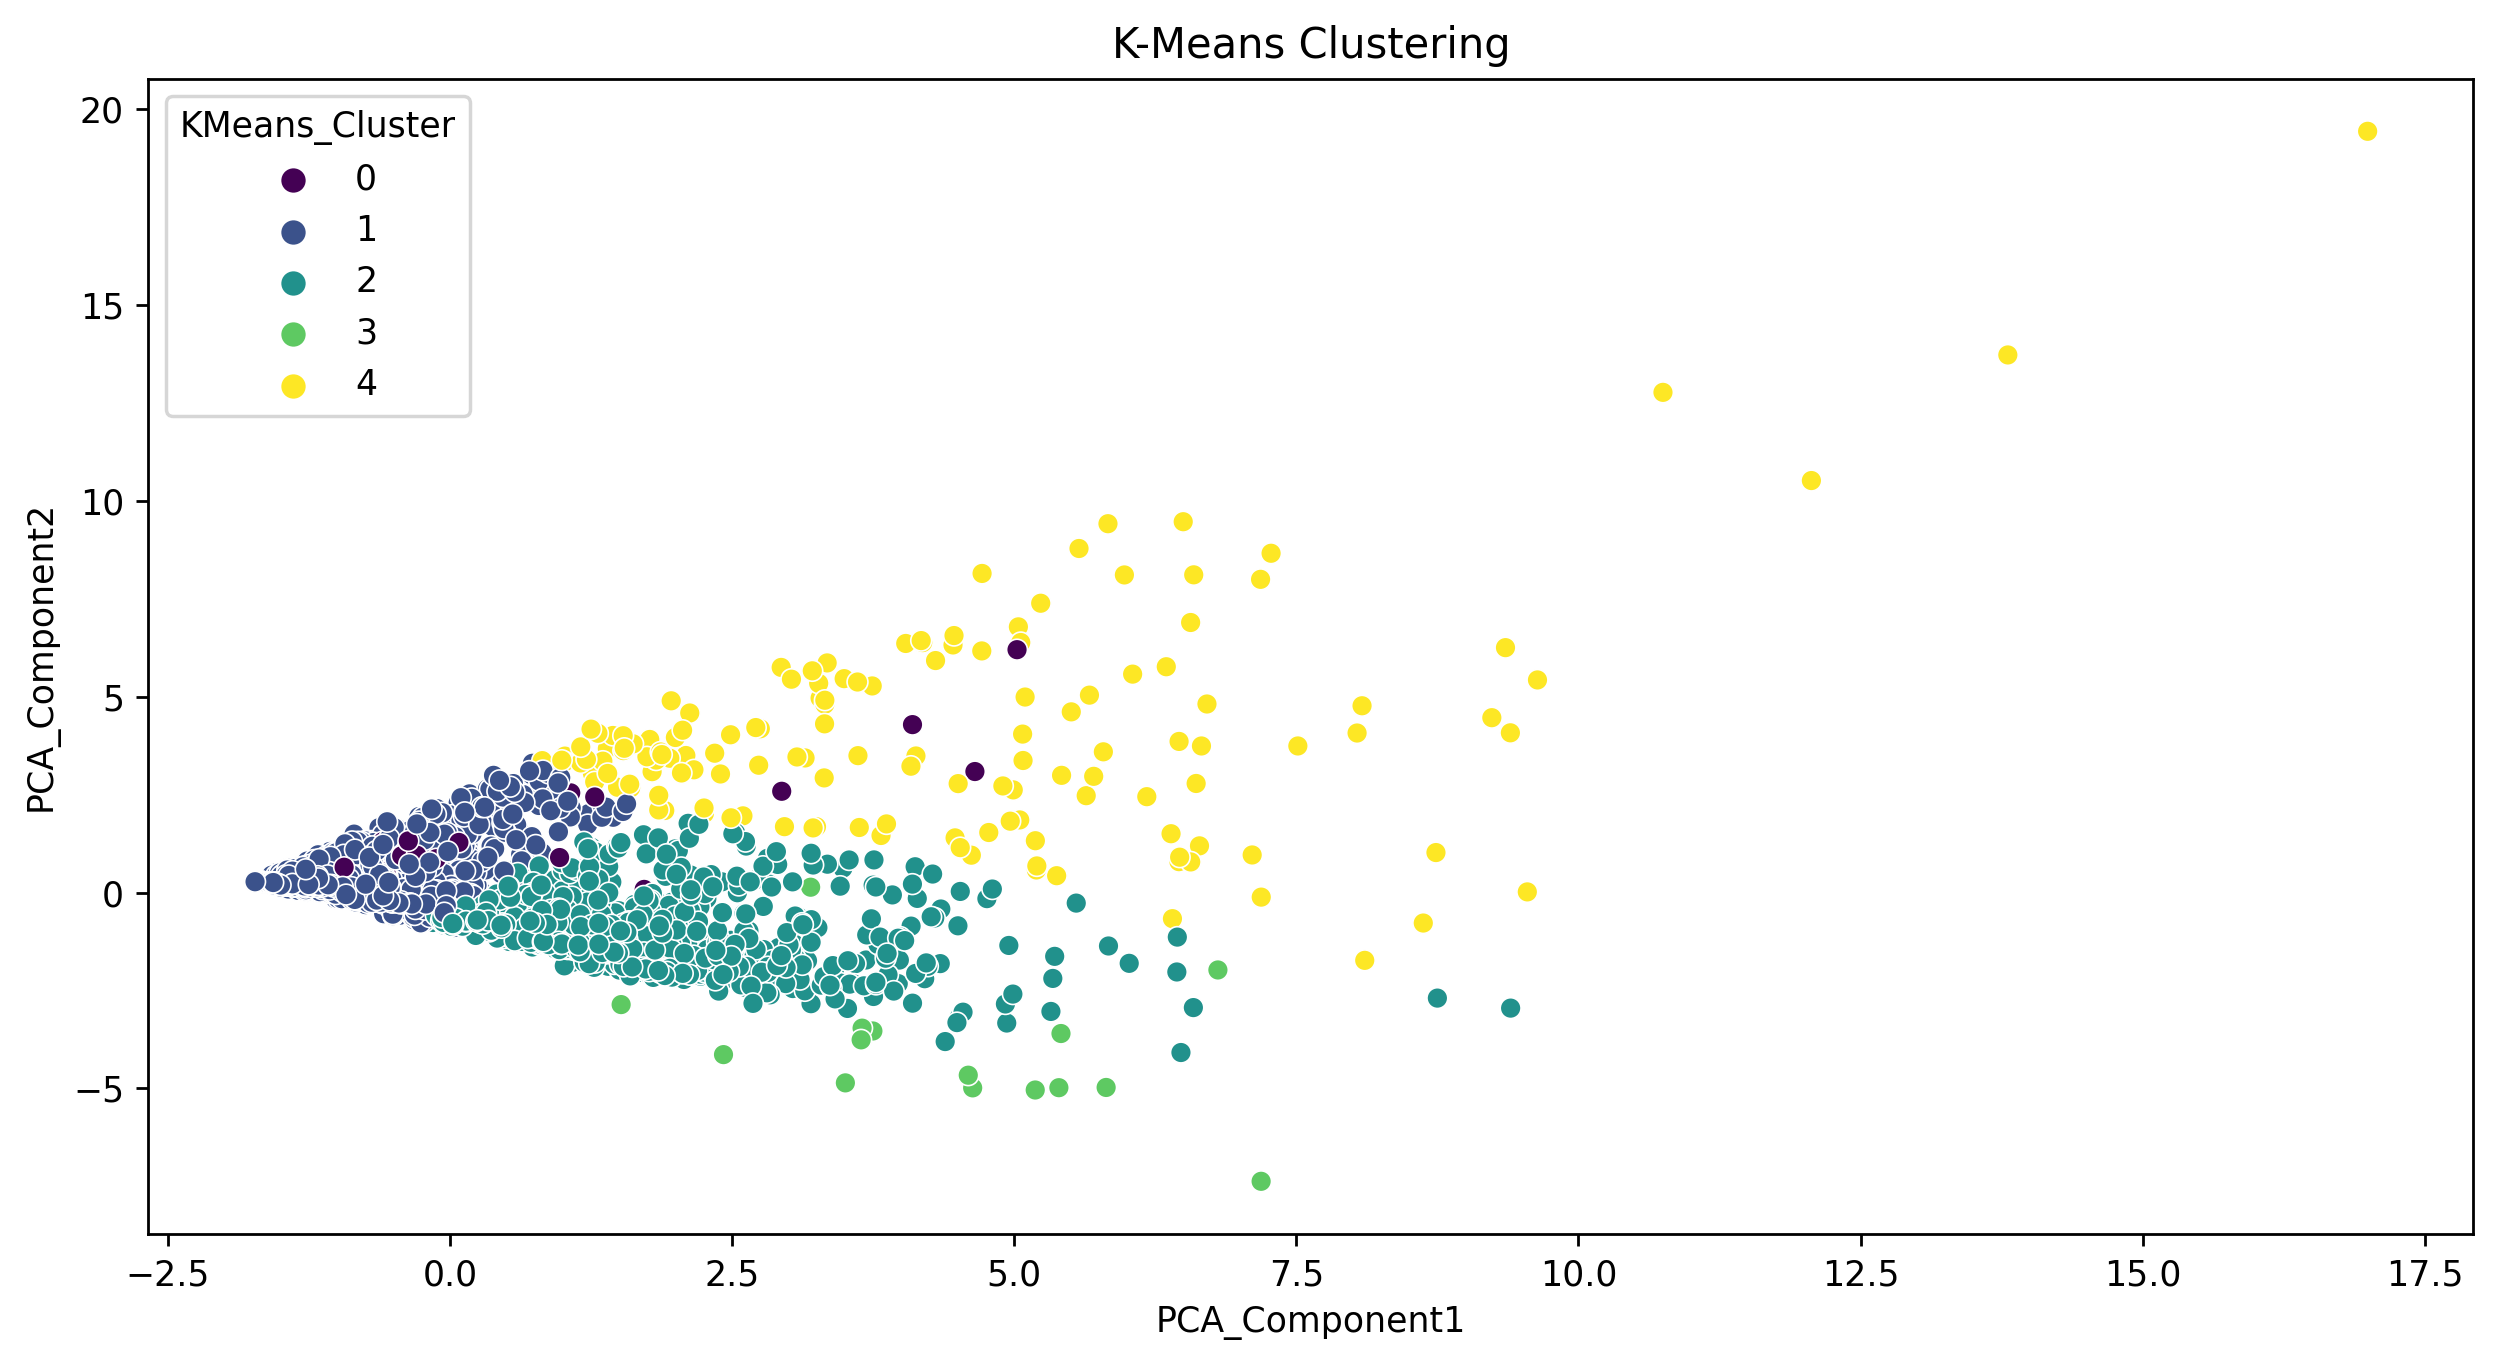

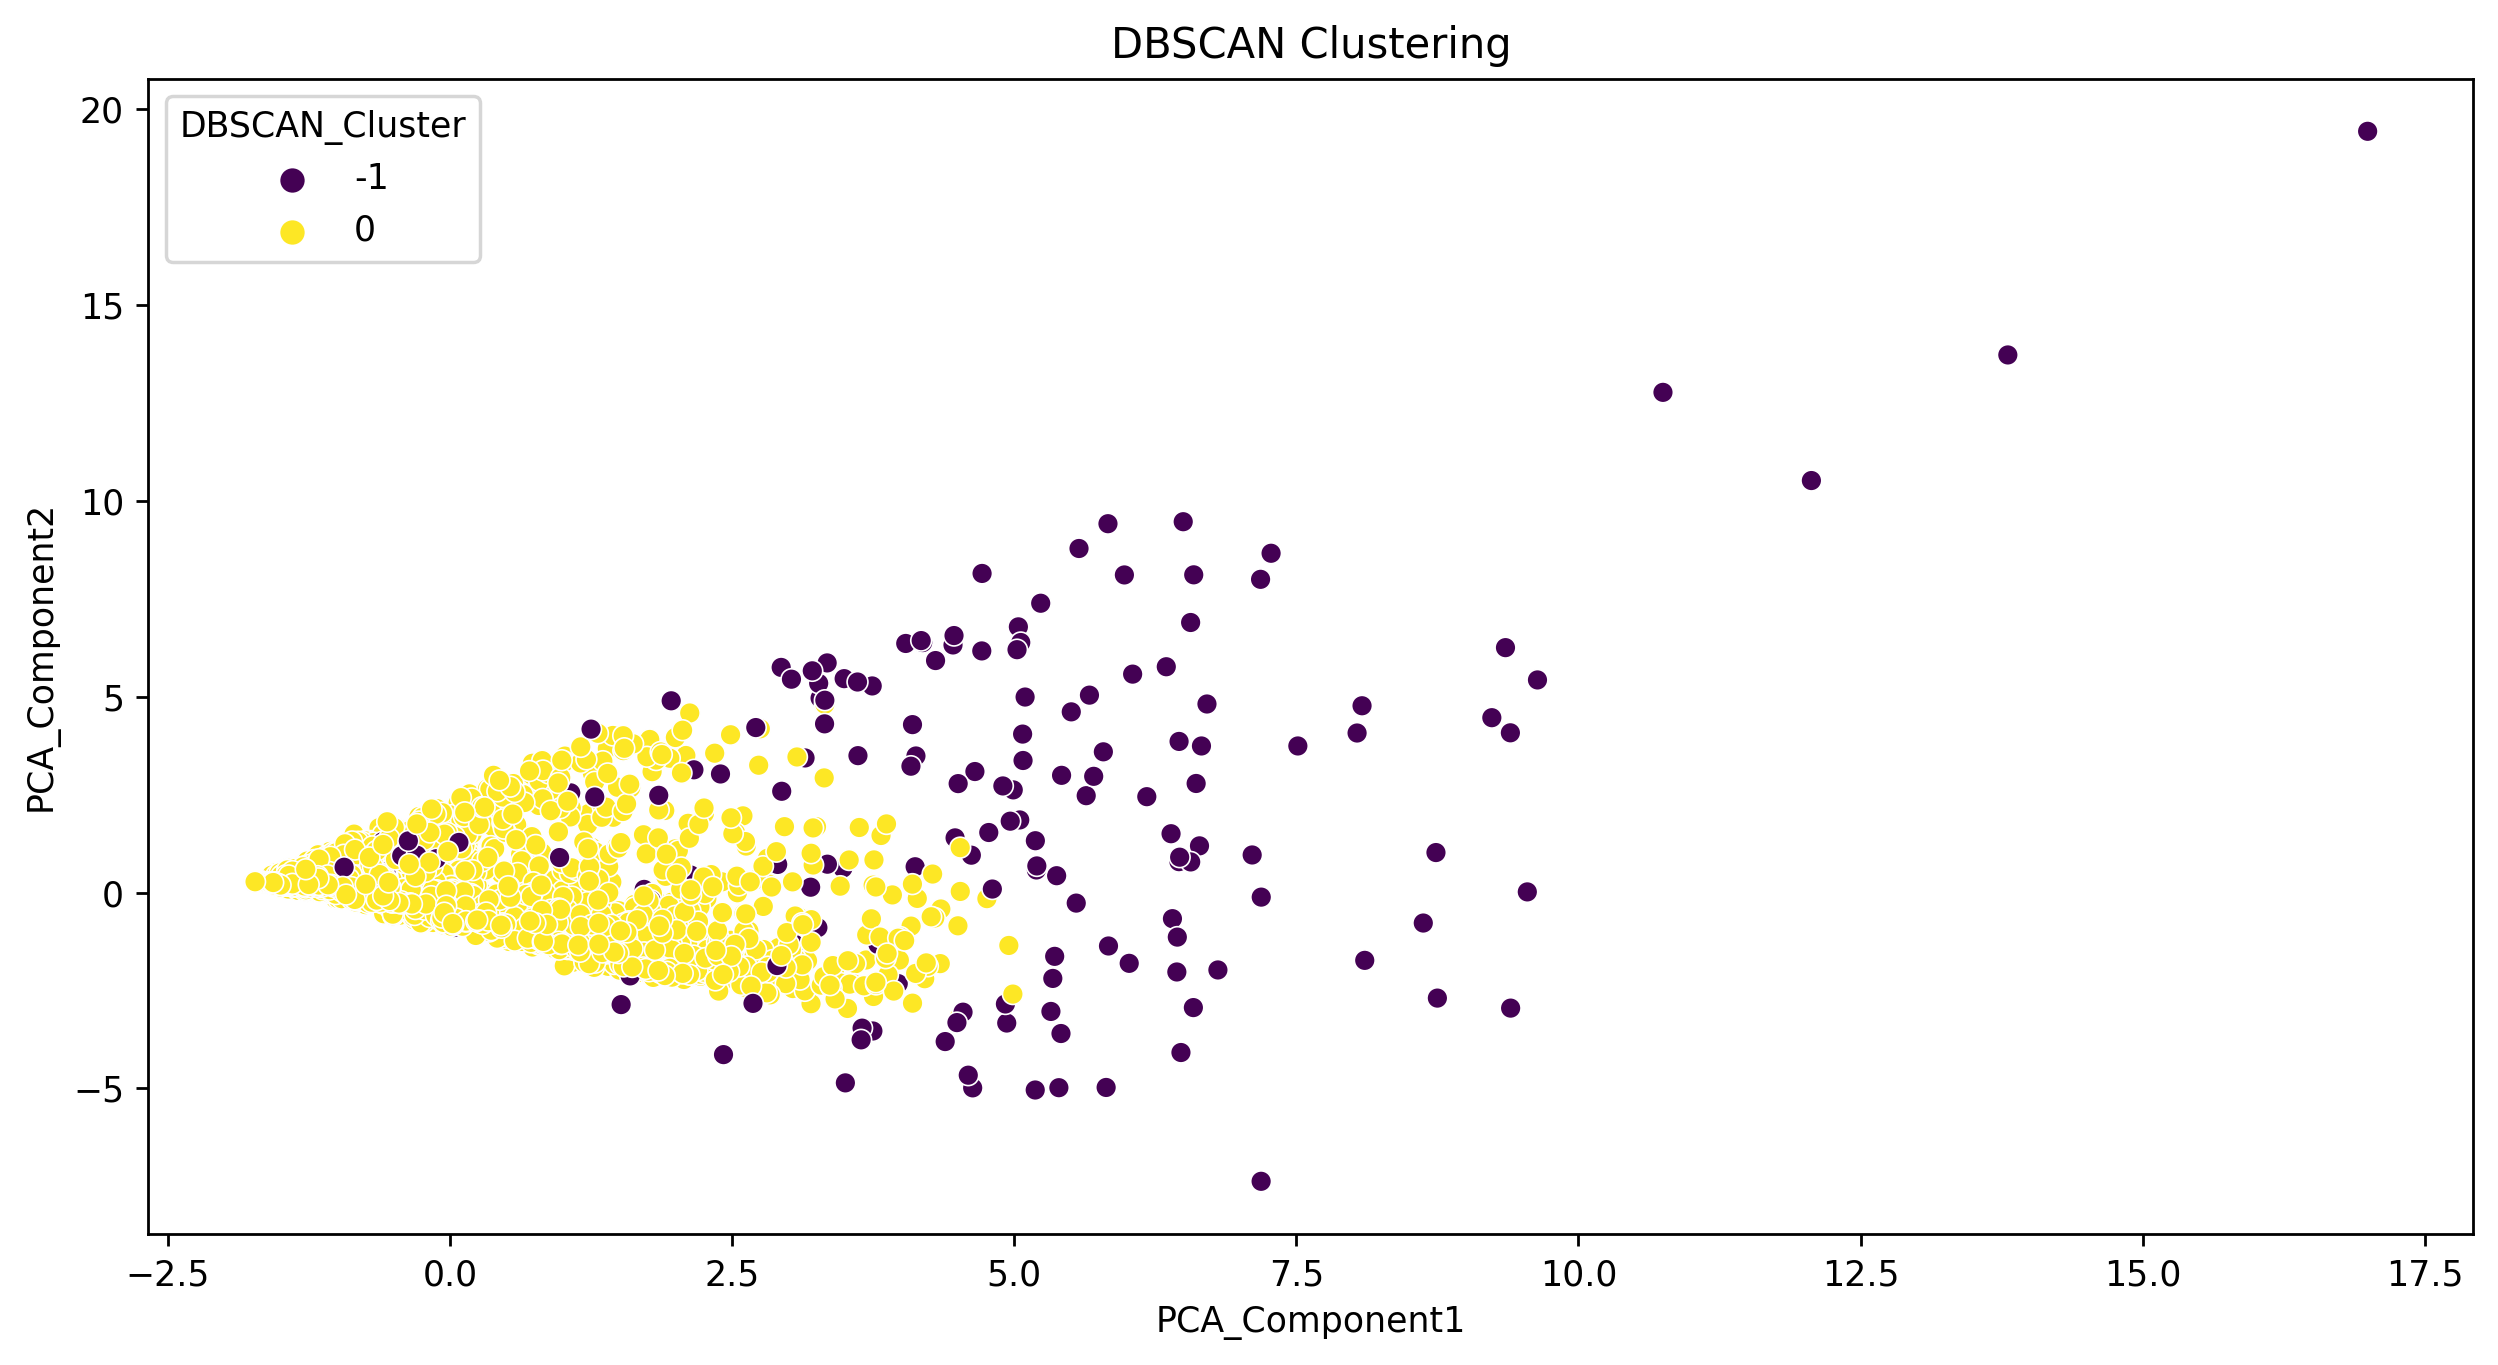

In [135]:
from sklearn.decomposition import PCA

# Perform PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA components to the data DataFrame
data['PCA_Component1'] = X_pca[:, 0]
data['PCA_Component2'] = X_pca[:, 1]

# Scatter plot for Hierarchical clustering
plt.figure(figsize=(12, 6))
sns.scatterplot(x='PCA_Component1', y='PCA_Component2', hue='Hierarchical_Cluster', data=data, palette='viridis')
plt.title('Hierarchical Clustering')
plt.show()

# Scatter plot for K-Means clustering
plt.figure(figsize=(12, 6))
sns.scatterplot(x='PCA_Component1', y='PCA_Component2', hue='KMeans_Cluster', data=data, palette='viridis')
plt.title('K-Means Clustering')
plt.show()

# Scatter plot for DBSCAN clustering
plt.figure(figsize=(12, 6))
sns.scatterplot(x='PCA_Component1', y='PCA_Component2', hue='DBSCAN_Cluster', data=data, palette='viridis')
plt.title('DBSCAN Clustering')
plt.show()


# interferences

In [136]:
# Inference for Hierarchical Clustering
hierarchical_inference = data.groupby('Hierarchical_Cluster').mean()
print("Inference for Hierarchical Clustering:")
hierarchical_inference

Inference for Hierarchical Clustering:


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,KMeans_Cluster,DBSCAN_Cluster,PCA_Component1,PCA_Component2
Hierarchical_Cluster,,,,,,,,,,,,,,,,
0,1739.521571,115580.267869,176.920155,3.479073,1.000000,1.000000,35656.230522,17.992917,651.886027,1.886027,4631.122988,0.568577,2.043142,-0.045074,1.349102,-0.605623
1,2201.721030,43389.023605,113.910730,1.114163,1.000000,1.000000,3825.349356,6.561803,138.656652,0.479828,3766.820172,0.224893,1.018884,0.000000,-1.074166,0.262882
2,1760.527273,153423.818182,617.509091,2.309091,1.000000,1.000000,38012.890909,35.236364,8575.654545,24.127273,4542.400000,0.872727,4.000000,-0.981818,6.041186,6.243735
3,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349,0.000000,-1.000000,0.101286,1.174851
4,1742.444444,129951.388889,65.666667,3.388889,1.000000,3.722222,86259.888889,26.222222,422.222222,1.333333,4488.777778,0.500000,2.777778,-1.000000,3.946147,-3.661386


In [137]:
# Inference for K-Means Clustering
kmeans_inference = data.groupby('KMeans_Cluster').mean()
print("\nInference for K-Means Clustering:")
kmeans_inference


Inference for K-Means Clustering:


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Hierarchical_Cluster,DBSCAN_Cluster,PCA_Component1,PCA_Component2
KMeans_Cluster,,,,,,,,,,,,,,,,
0,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349,3.000000,-1.000000,0.101286,1.174851
1,2186.890781,43488.519518,125.593854,1.127492,1.000000,1.000415,3921.085963,6.416113,224.453904,0.690199,3789.851744,0.237542,0.950997,-0.000415,-1.034375,0.324713
2,1743.903902,112400.756503,129.539017,3.671243,1.000000,1.001445,37498.003613,18.497110,307.190751,0.914017,4621.782514,0.554191,0.037572,-0.025289,1.284681,-0.983063
3,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333,4.000000,-1.000000,4.447526,-4.003847
4,1712.154362,194738.879195,620.268456,2.275168,1.000000,1.000000,34781.523490,27.993289,5647.469799,16.422819,4749.912752,0.785235,0.738255,-0.610738,4.306776,3.947575


In [138]:
# Inference for DBSCAN Clustering
dbscan_inference = data.groupby('DBSCAN_Cluster').mean()
print("\nInference for DBSCAN Clustering:")
dbscan_inference


Inference for DBSCAN Clustering:


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Hierarchical_Cluster,KMeans_Cluster,PCA_Component1,PCA_Component2
DBSCAN_Cluster,,,,,,,,,,,,,,,,
-1,1645.318919,245421.200000,360.491892,2.643243,1.313514,1.264865,52593.80000,27.248649,3745.648649,10.724324,4911.751351,0.724324,1.670270,2.594595,4.039299,1.868921
0,2032.742265,65267.117724,133.619035,2.031201,1.000000,1.000000,15425.37677,10.842947,300.686418,0.920031,4080.085212,0.353173,0.611432,1.399318,-0.195928,-0.090653


#the bar plot for all types of clusters

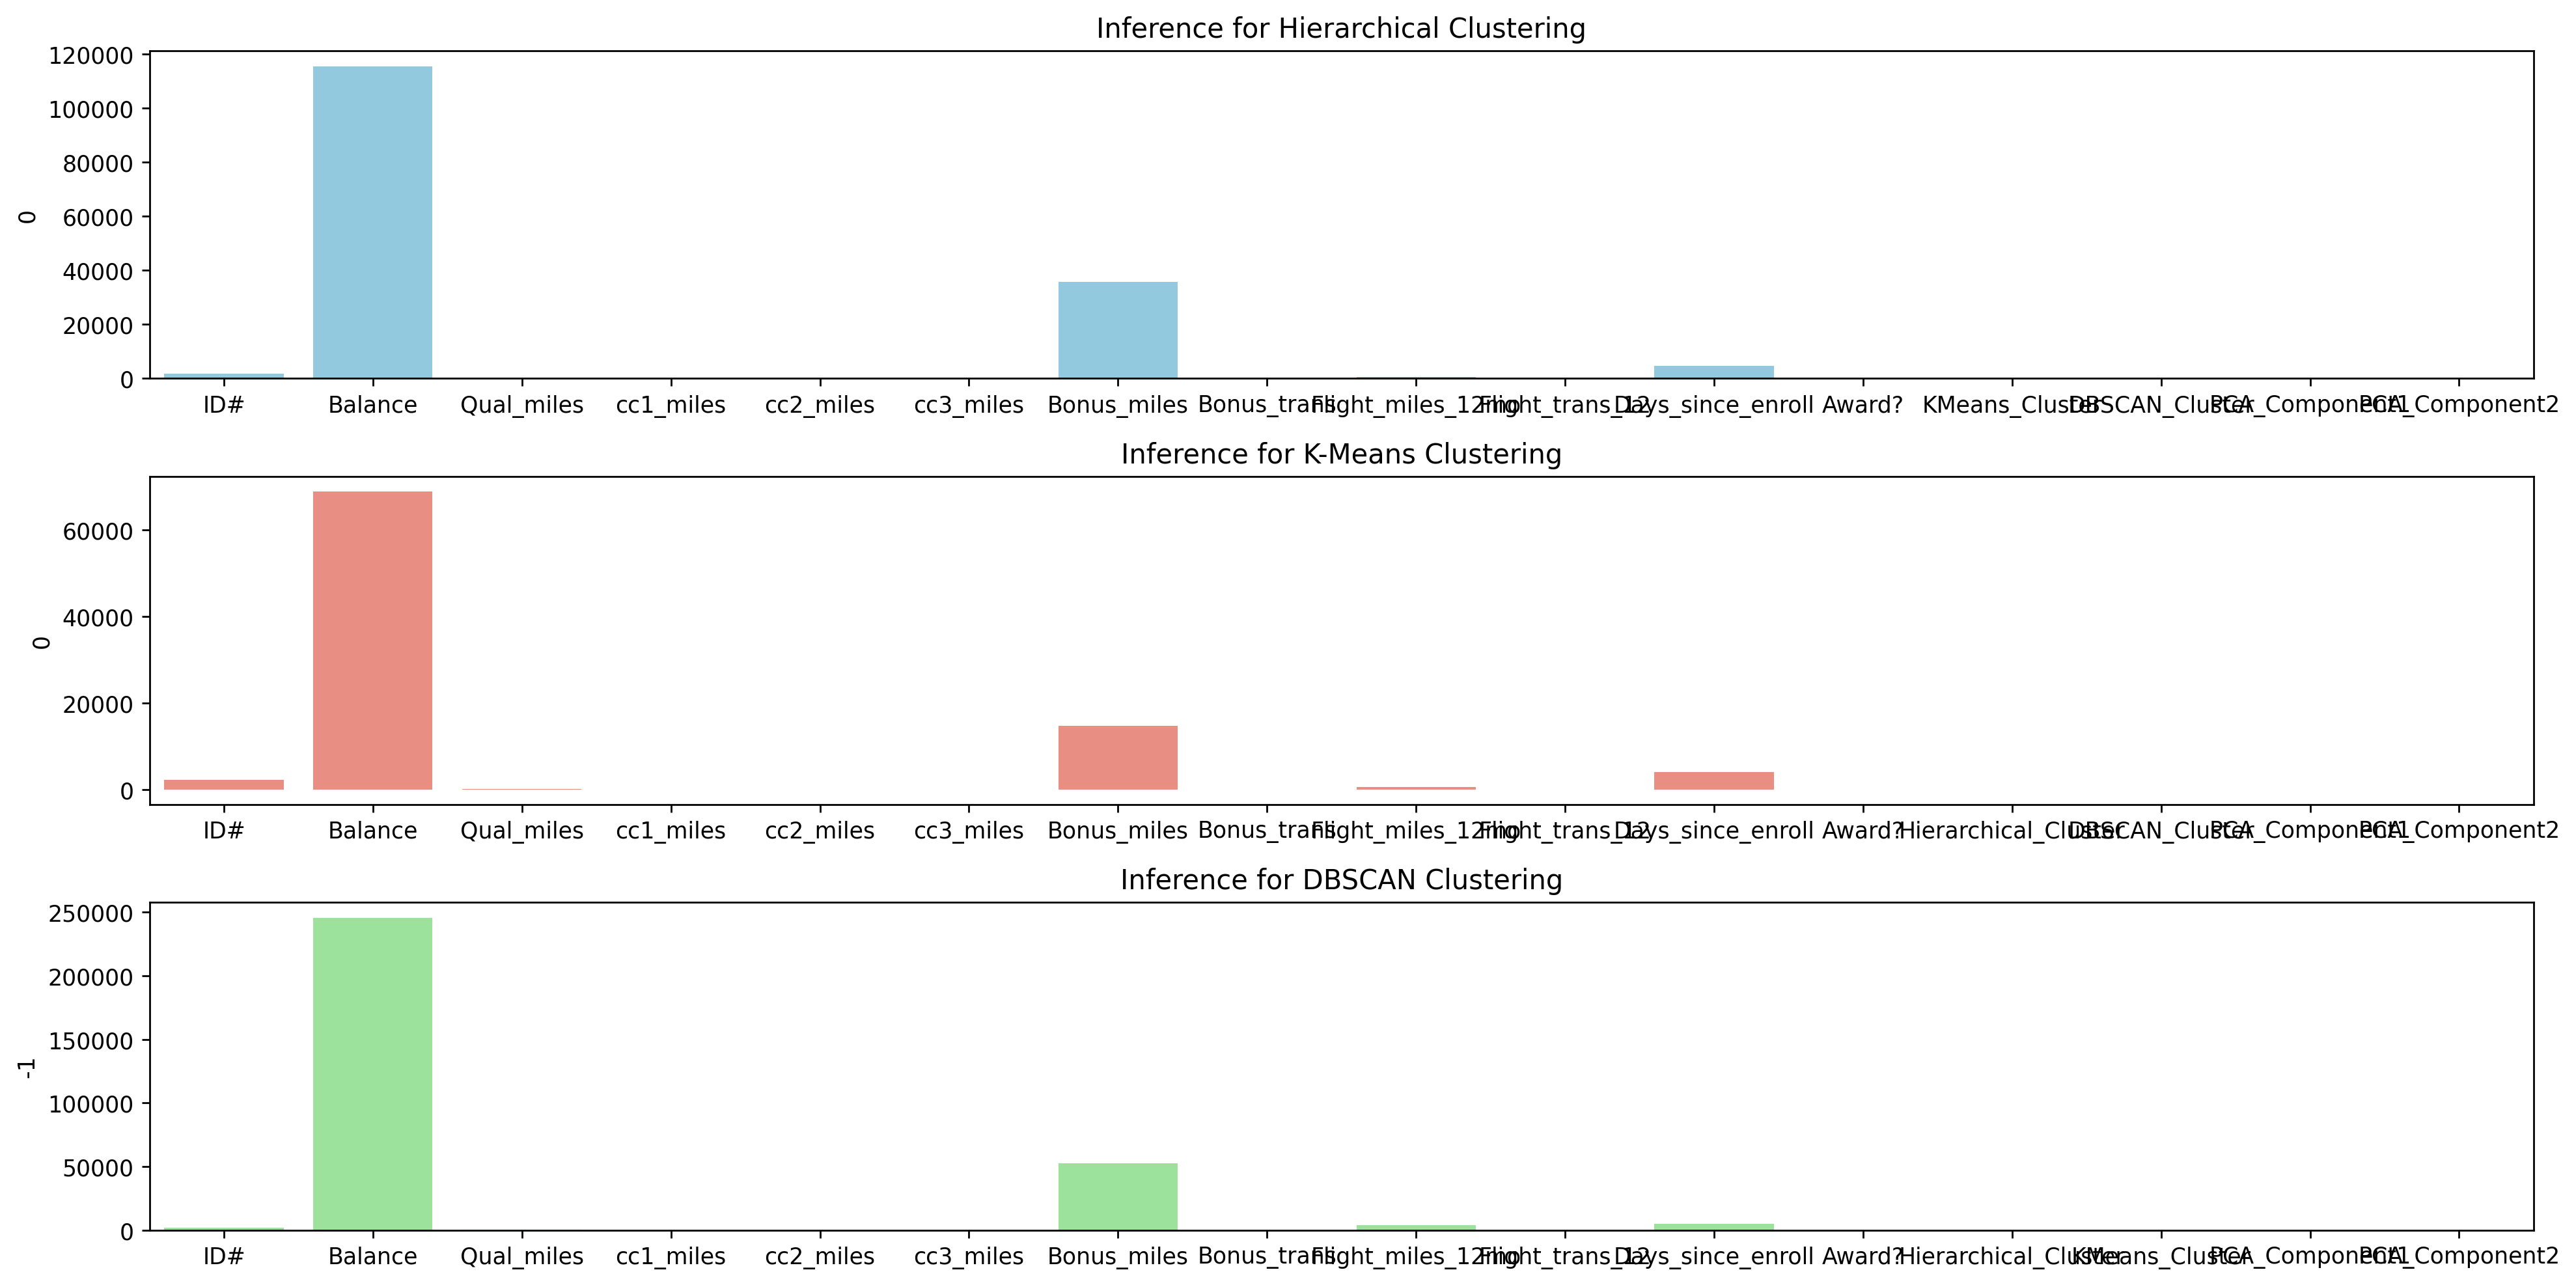

In [139]:
# Set the figure size
plt.figure(figsize=(16, 8))

# Bar plot for Hierarchical Clustering
plt.subplot(3, 1, 1)
sns.barplot(x=hierarchical_inference.columns, y=hierarchical_inference.iloc[0], color='skyblue')
plt.title('Inference for Hierarchical Clustering')

# Bar plot for K-Means Clustering
plt.subplot(3, 1, 2)
sns.barplot(x=kmeans_inference.columns, y=kmeans_inference.iloc[0], color='salmon')
plt.title('Inference for K-Means Clustering')

# Bar plot for DBSCAN Clustering
plt.subplot(3, 1, 3)
sns.barplot(x=dbscan_inference.columns, y=dbscan_inference.iloc[0], color='lightgreen')
plt.title('Inference for DBSCAN Clustering')

# Adjust layout
plt.tight_layout()
plt.show()
